<h1><center>EE69210: Machine Learning for Signal Processing Laboratory</center></h1>
<h2><center>Experiment-1: Dimensionality Reduction</center></h2>
<h3><center>Anirvan Krishna | 21EE38002</center></h3>

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that transforms a high-dimensional dataset into a lower-dimensional one while preserving as much variance as possible. The algorithm for PCA can be summarized in the following steps:

1. **Data Standardization**:
    - Given the original dataset $\mathbf{X}^*$, standardize the data by subtracting the mean $\mu$ of each feature to obtain the zero-centered data $\mathbf{X}$.
    $$
    \mathbf{X} = \mathbf{X}^* - \mu
    $$

2. **Compute the Correlation Matrix**:
    - Calculate the correlation matrix $\mathbf{R}_X$ of the zero-centered data $\mathbf{X}$.
    $$
    \mathbf{R}_X = \frac{1}{n} \mathbf{X} \mathbf{X}^T
    $$
    where $n$ is the number of samples.

3. **Eigen Decomposition**:
    - Perform eigen decomposition on the correlation matrix $\mathbf{R}_X$ to obtain the eigenvalues and eigenvectors.
    $$
    \mathbf{R}_X \mathbf{A} = \mathbf{A} \mathbf{\Lambda}
    $$
    where $\mathbf{A}$ is the matrix of eigenvectors and $\mathbf{\Lambda}$ is the diagonal matrix of eigenvalues.

4. **Sort Eigenvalues and Eigenvectors**:
    - Sort the eigenvalues in descending order and rearrange the corresponding eigenvectors to form the matrix $\mathbf{A}$.

5. **Project the Data**:
    - Transform the original dataset $\mathbf{X}$ into the new subspace using the eigenvector matrix $\mathbf{A}$ to obtain the transformed dataset $\mathbf{Y}$.
    $$
    \mathbf{Y} = \mathbf{A}^T \mathbf{X}
    $$

6. **Dimensionality Reduction**:
    - Select the top $m$ eigenvectors corresponding to the largest $m$ eigenvalues to form the reduced eigenvector matrix $\mathbf{A}_m$. Project the data onto this reduced subspace.
    $$
    \mathbf{Y}_m = \mathbf{A}_m^T \mathbf{X}
    $$

## Dataset-1: Synthetic Data

### Data Generation, Visualization and Zero-Centering

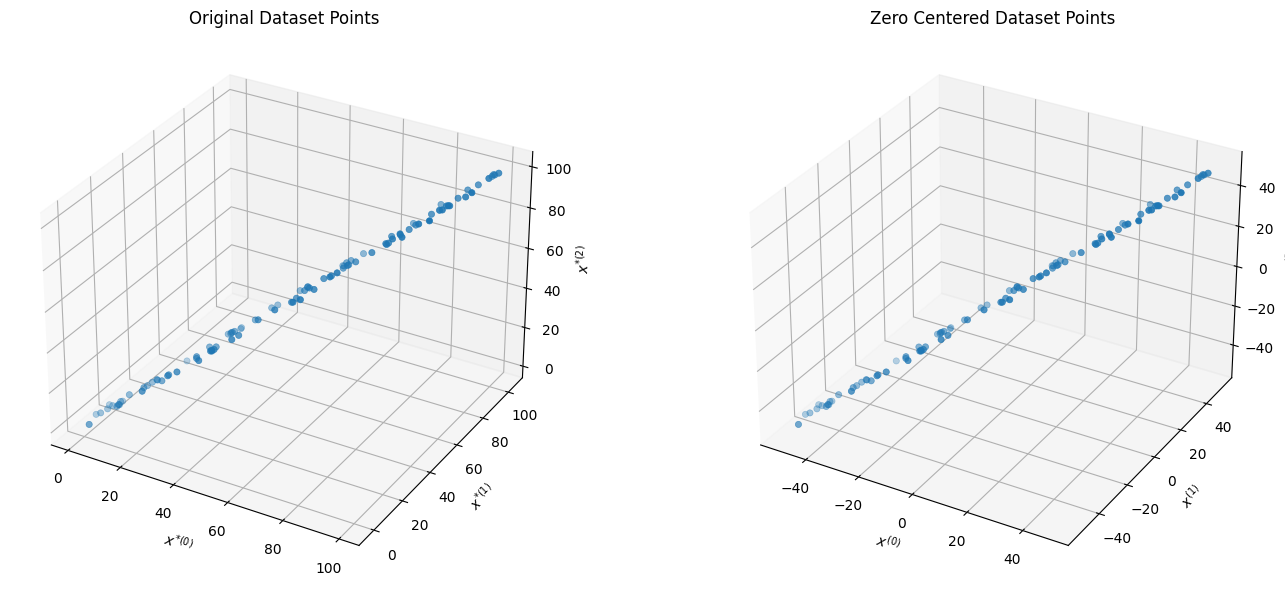

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating Data point vectors x_0 , x_1 and x_2 for dataset X.
x_ast0 = np.random.uniform(0, 100, 100)
x_ast1 = x_ast0 + np.random.uniform(-10, 10, 100)
x_ast2 = x_ast0 + np.random.uniform(-1, 1, 100)

# Stacking the x_ast0 , x_ast1 and x_ast2 in X
X_ast = np.stack((x_ast0, x_ast1, x_ast2))

# Zero centering the data
mu = np.mean(X_ast, axis=1)
X = np.zeros(X_ast.shape)

for i, x_1 in enumerate(X_ast.transpose()):
    X[:, i] = x_1 - mu

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(15, 6))

# Plotting the original dataset points
ax1.scatter(x_ast0, x_ast1, x_ast2, linewidth=0.5)
ax1.set_xlabel('$x ^{*(0)}$')
ax1.set_ylabel('$x ^{*(1)}$')
ax1.set_zlabel('$x ^{*(2)}$')
ax1.set_title('Original Dataset Points')

# Plotting the zero-centered dataset points
ax2.scatter(X[0, :], X[1, :], X[2, :], linewidth=0.5)
ax2.set_xlabel('$x ^{(0)}$')
ax2.set_ylabel('$x ^{(1)}$')
ax2.set_zlabel('$x ^{(2)}$')
ax2.set_title('Zero Centered Dataset Points')

plt.tight_layout()
plt.show()

### Eigen Value Computation 

In [3]:
Rx = np.dot(X, X.T)/X.shape[1]
print(Rx)

[[821.85756285 815.20534256 822.19566987]
 [815.20534256 836.66264858 815.59373204]
 [822.19566987 815.59373204 822.88452334]]


In [4]:
lmd, A = np.linalg.eig(Rx)
print(f"Eigen Values:\n {lmd}\n")
print(f"Eigen Vectors:\n {A}")

Eigen Values:
 [2.46246999e+03 1.74950497e-01 1.87597985e+01]

Eigen Vectors:
 [[-0.57659346 -0.70884472  0.40629933]
 [-0.57853023  0.00307063 -0.81565516]
 [-0.57692526  0.70535787  0.41185861]]


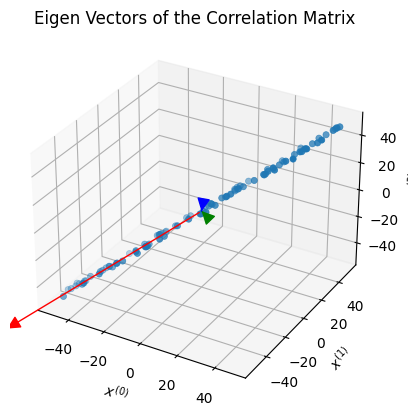

In [5]:
# Plotting eigenvectors along with the samples
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self , xs , ys , zs , *args , ** kwargs):
        FancyArrowPatch.__init__(self , (0,0), (0,0), *args , ** kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

ax = plt.axes(projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:], linewidth=0.5)
ax.set_xlabel('$x ^{(0)}$')
ax.set_ylabel('$x ^{(1)}$')
ax.set_zlabel('$x ^{(2)}$')
ax.set_title('Eigen Vectors of the Correlation Matrix')

str = ['red','green','blue']

for it, a1 in enumerate(A.transpose()):
    
    a = Arrow3D([0,((a1[0]* lmd[it])/20) ],[0,((a1[1]* lmd[it])/20) ],
                [0,((a1[2]*lmd[it])/20)], arrowstyle="-|>", 
                mutation_scale =20, color=str[it])
    
    ax.add_artist(a)

### Sample Projections on Eigen Vectors

In [6]:
def sort_eigenvectors_by_eigenvalues(eigenvalues, eigenvectors):
    # Get the sorted indices of the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    # Sort the eigenvalues
    sorted_eigenvalues = eigenvalues[sorted_indices]
    # Sort the eigenvectors according to the sorted indices
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

lmd, A = sort_eigenvectors_by_eigenvalues(lmd, A)
print(f"Sorted Eigen Values:\n {lmd}\n")
print(f"Sorted Eigen Vectors:\n {A}")

Sorted Eigen Values:
 [2.46246999e+03 1.87597985e+01 1.74950497e-01]

Sorted Eigen Vectors:
 [[-0.57659346  0.40629933 -0.70884472]
 [-0.57853023 -0.81565516  0.00307063]
 [-0.57692526  0.41185861  0.70535787]]


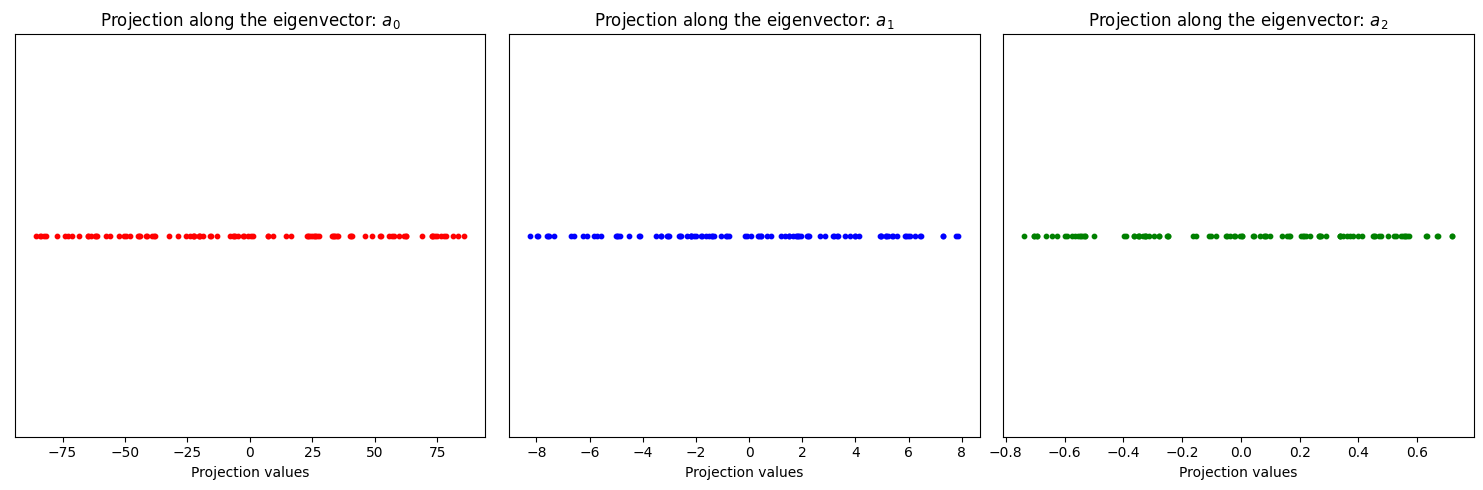

In [7]:
# Projecting the data onto the eigenvectors
Y = np.dot(A.T, X)

# Plotting the projected data
fig = plt.figure(figsize=(15, 5))
colors = ['red', 'blue', 'green']

for i in range(Y.shape[0]):
    
    plt.subplot(1, Y.shape[0], i + 1)
    plt.scatter(Y[i, :], np.zeros(Y.shape[1]), s=10, color=colors[i])
    plt.title(f"Projection along the eigenvector: $a_{i}$")
    plt.xlabel("Projection values")  
    plt.yticks([])  

plt.tight_layout()  
plt.show()

### Estimation of $\mathbf{R}_Y$

In [8]:
Ry = np.dot(Y, Y.T)/Y.shape[1]
Ryp = np.dot(A.T, np.dot(Rx, A))
print(f"Ry:\n {Ry}\n")
print(f"Ryp:\n {Ry}")

Ry:
 [[ 2.46246999e+03  2.06454006e-13 -2.16516233e-13]
 [ 2.06454006e-13  1.87597985e+01 -2.03949144e-13]
 [-2.16516233e-13 -2.03949144e-13  1.74950497e-01]]

Ryp:
 [[ 2.46246999e+03  2.06454006e-13 -2.16516233e-13]
 [ 2.06454006e-13  1.87597985e+01 -2.03949144e-13]
 [-2.16516233e-13 -2.03949144e-13  1.74950497e-01]]


### Dimensionality Reduction

Text(0, 0.5, '$y^{(1)}$')

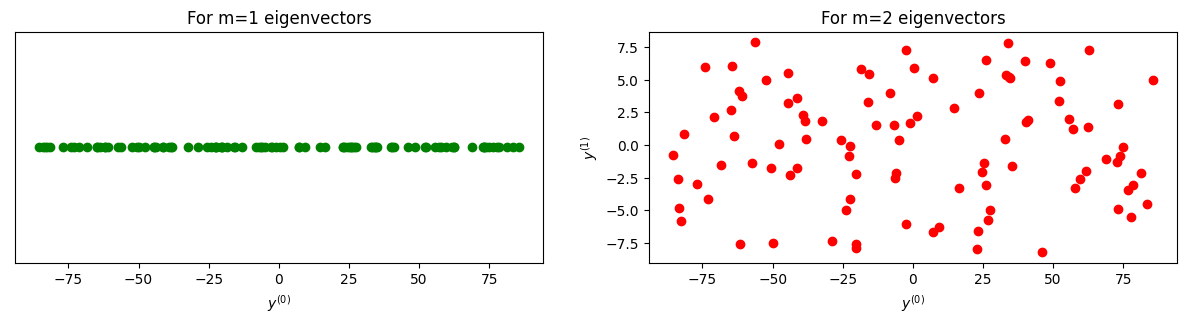

In [9]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)

Y_m1 = Y[0]
plt.scatter(Y_m1, np.zeros(Y[0].shape), 
            color="green")
plt.title("For m=1 eigenvectors")
plt.xlabel("$y^{(0)}$")
plt.yticks([])

plt.subplot(1, 2, 2)

Y_m2 = np.stack((Y[0], Y[1]))
plt.scatter(Y_m2[0], Y_m2[1], color="red")
plt.title("For m=2 eigenvectors")
plt.xlabel("$y^{(0)}$")
plt.ylabel("$y^{(1)}$")

### Recovery of $\mathbf{X}$ from $\mathbf{Y}$

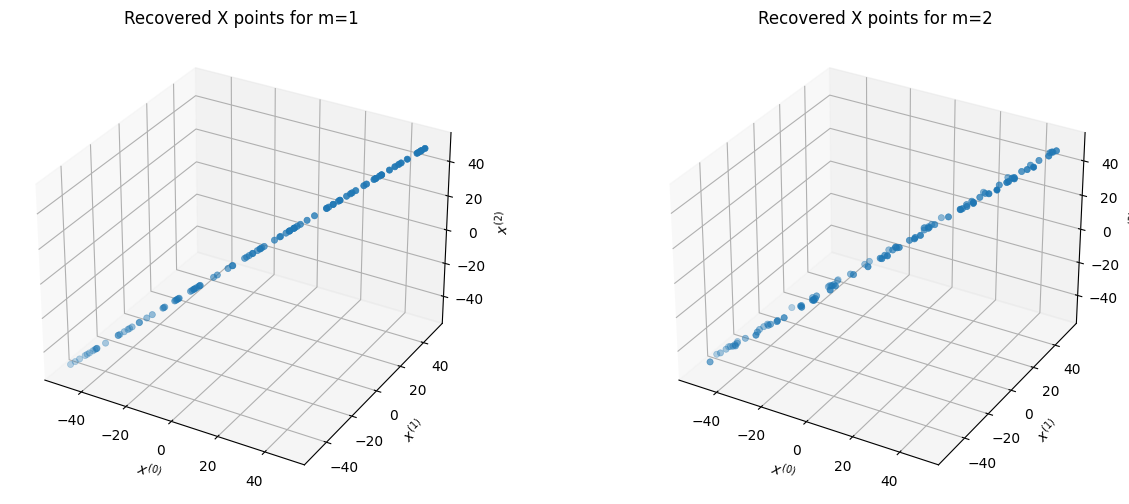

In [10]:
# Recovering the original data matrix X from the projected data matrices Y_m1 and Y_m2
X_recovered_m1 = np.dot(A[:, 0].reshape(-1, 1), Y_m1.reshape(1, -1))
X_recovered_m2 = np.dot(A[:, :2], Y_m2)

# Plotting the recovered data for m=1
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_recovered_m1[0, :], X_recovered_m1[1, :], X_recovered_m1[2, :], linewidth=0.5)
ax.set_xlabel('$x ^{(0)}$')
ax.set_ylabel('$x ^{(1)}$')
ax.set_zlabel('$x ^{(2)}$')
ax.set_title('Recovered X points for m=1')

# Plotting the recovered data for m=2
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_recovered_m2[0, :], X_recovered_m2[1, :], X_recovered_m2[2, :], linewidth=0.5)
ax.set_xlabel('$x ^{(0)}$')
ax.set_ylabel('$x ^{(1)}$')
ax.set_zlabel('$x ^{(2)}$')
ax.set_title('Recovered X points for m=2')

plt.show()

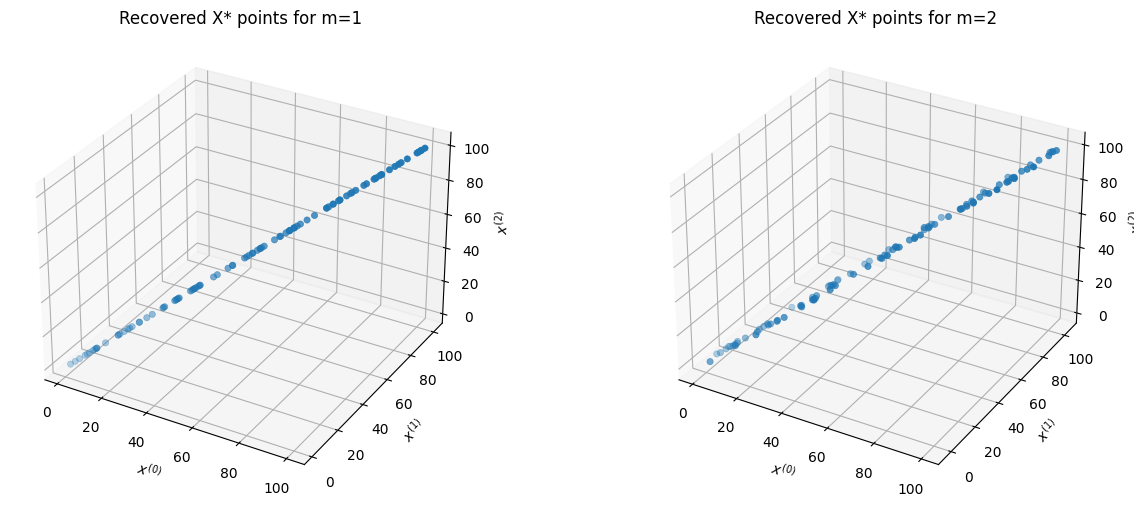

In [11]:
# Recovering the original data matrix X from the projected data matrices Y_m1 and Y_m2
X_ast_recovered_m1 = X_recovered_m1 + mu.reshape(3, 1)
X_ast_recovered_m2 = X_recovered_m2 + mu.reshape(3, 1)

# Plotting the recovered data for m=1
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_ast_recovered_m1[0, :], X_ast_recovered_m1[1, :],
           X_ast_recovered_m1[2, :], linewidth=0.5)
ax.set_xlabel('$x ^{(0)}$')
ax.set_ylabel('$x ^{(1)}$')
ax.set_zlabel('$x ^{(2)}$')
ax.set_title('Recovered X* points for m=1')

# Plotting the recovered data for m=2
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_ast_recovered_m2[0, :], X_ast_recovered_m2[1, :],
           X_ast_recovered_m2[2, :], linewidth=0.5)
ax.set_xlabel('$x ^{(0)}$')
ax.set_ylabel('$x ^{(1)}$')
ax.set_zlabel('$x ^{(2)}$')
ax.set_title('Recovered X* points for m=2')

plt.show()

#### Eigen Vectors used for Reconstruction

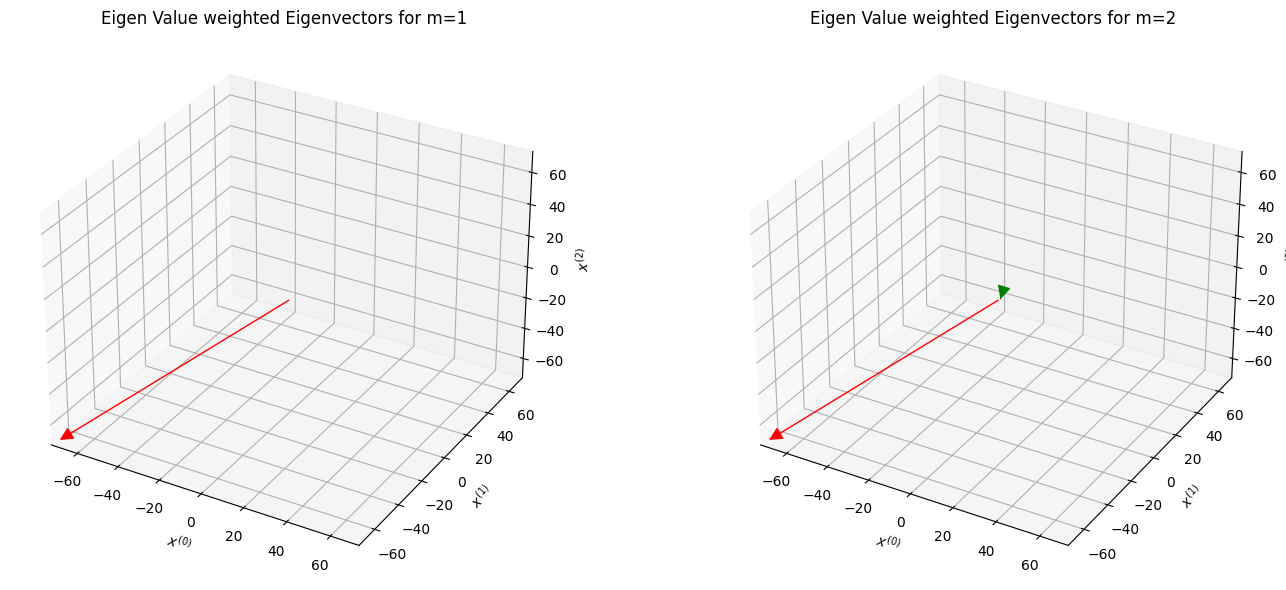

In [12]:
# Create a figure with two subplots side by side
fig = plt.figure(figsize=(15, 6))

# First subplot - m=1 case
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlabel('$x ^{(0)}$')
ax1.set_ylabel('$x ^{(1)}$') 
ax1.set_zlabel('$x ^{(2)}$')
ax1.set_xlim(-70, 70)
ax1.set_ylim(-70, 70)
ax1.set_zlim(-70, 70)
ax1.set_title('Eigen Value weighted Eigenvectors for m=1')

# Plot arrow for first eigenvector
a1 = Arrow3D([0, ((A.T[0][0] * lmd[0])/20)], [0, ((A.T[0][1] * lmd[0])/20)],
            [0, ((A.T[0][2]*lmd[0])/20)], arrowstyle="-|>",
            mutation_scale=20, color='red')
ax1.add_artist(a1)

# Second subplot - m=2 case
ax2 = fig.add_subplot(122, projection='3d') 
ax2.set_xlabel('$x ^{(0)}$')
ax2.set_ylabel('$x ^{(1)}$')
ax2.set_zlabel('$x ^{(2)}$')
ax2.set_xlim(-70, 70)
ax2.set_ylim(-70, 70)
ax2.set_zlim(-70, 70)
ax2.set_title('Eigen Value weighted Eigenvectors for m=2')

# Plot arrows for first two eigenvectors
for i in range(2):
    a2 = Arrow3D([0, ((A.T[i][0] * lmd[i])/20)], [0, ((A.T[i][1] * lmd[i])/20)],
                [0, ((A.T[i][2]*lmd[i])/20)], arrowstyle="-|>",
                mutation_scale=20, color=['red','green'][i])
    ax2.add_artist(a2)
    
plt.tight_layout()

#### Mean Squared Error (MSE) Calculations

In [31]:
## MSE for m=1
mse1 = np.mean((X_ast - X_ast_recovered_m1)**2)
print(f"Mean Squared Error for m=1: {mse1}")

## MSE for m=2
mse2 = np.mean((X_ast - X_ast_recovered_m2)**2)
print(f"Mean Squared Error for m=2: {mse2}")

Mean Squared Error for m=1: 6.96934072873474
Mean Squared Error for m=2: 0.05473209978662768


## Dataset-2: Olivetti Faces

#### Dataset Formation

In [14]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition
from numpy.random import RandomState

rng = RandomState(0)

faces , _ = fetch_olivetti_faces(return_X_y=True , 
                                 shuffle=True , random_state=rng)
n_samples , n_features = faces.shape

# Zero centering of sample images
faces_centered = faces - faces.mean(axis =0)

# Dataset
X = faces_centered.T

#### Covariance Matrix $\mathbf{R_x}$ Calculation

In [15]:
# Covariance matrix
Rx = np.dot(X, X.T)/X.shape[1]
print(Rx)

[[ 0.03256897  0.03221722  0.02860266 ... -0.00627397 -0.00599633
  -0.00466273]
 [ 0.03221722  0.03582188  0.03403025 ... -0.00892454 -0.00845001
  -0.0067429 ]
 [ 0.02860266  0.03403025  0.03782977 ... -0.01215859 -0.0113095
  -0.00946599]
 ...
 [-0.00627397 -0.00892454 -0.01215859 ...  0.03519638  0.03136033
   0.02796677]
 [-0.00599633 -0.00845001 -0.0113095  ...  0.03136033  0.03363069
   0.03122918]
 [-0.00466273 -0.0067429  -0.00946599 ...  0.02796677  0.03122918
   0.03254725]]


#### Eigen Vector $\mathbf{A}$ Calculation

In [16]:
lmd, A = np.linalg.eig(Rx)
print(f"Eigen Values:\n {lmd}\n")
print(f"Eigen Vectors:\n {A}")

Eigen Values:
 [ 1.8793076e+01  1.1044083e+01  6.2888532e+00 ...  3.6854009e-09
  3.5964429e-09 -4.6804987e-09]

Eigen Vectors:
 [[-0.0041911   0.02859139 -0.00135691 ... -0.00428017 -0.0020939
   0.00019342]
 [-0.0071095   0.03328836  0.0003258  ... -0.00802645 -0.01915617
   0.00828006]
 [-0.00933609  0.0378465   0.00019799 ...  0.0015672  -0.00066744
   0.00102171]
 ...
 [ 0.00018516 -0.02962783  0.01541365 ...  0.02948698  0.01187907
   0.01271563]
 [ 0.00337966 -0.02721298  0.01370978 ... -0.03191775  0.01749105
  -0.01243174]
 [ 0.00318826 -0.02488899  0.01188341 ...  0.01676145 -0.00667074
   0.00653674]]


In [17]:
sorted_indices = np.argsort(lmd)[::-1]
sorted_eigenvalues = lmd[sorted_indices][:5]
sorted_eigenvectors = A[:, sorted_indices[:5]]
print(f"Top-5 Eigenvectors:\n {sorted_eigenvectors}\n")
print(f"Top-5 Eigenvalues:\n {sorted_eigenvalues}")

Top-5 Eigenvectors:
 [[-0.0041911   0.02859139 -0.00135691  0.00112445  0.02384273]
 [-0.0071095   0.03328836  0.0003258  -0.0017902   0.02359115]
 [-0.00933609  0.0378465   0.00019799 -0.01168215  0.02216145]
 ...
 [ 0.00018516 -0.02962783  0.01541365  0.02943002  0.04243938]
 [ 0.00337966 -0.02721298  0.01370978  0.02781921  0.04007453]
 [ 0.00318826 -0.02488899  0.01188341  0.02521855  0.04110328]]

Top-5 Eigenvalues:
 [18.793076  11.044083   6.288853   3.9446976  2.8489025]


#### Plotting Eigen Faces

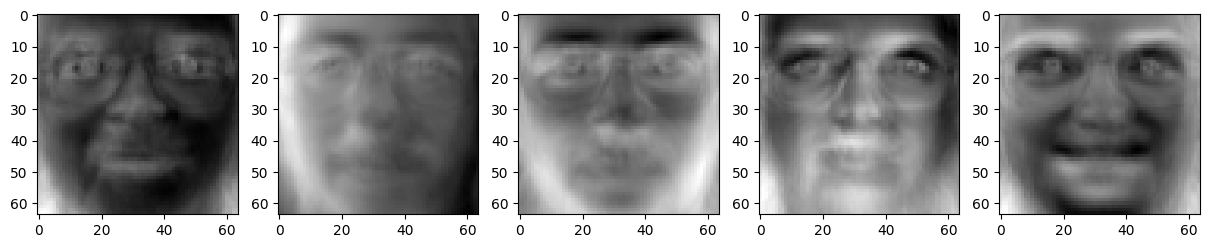

In [18]:
plt.figure(figsize=(15, 3))
for i, vector in enumerate(sorted_eigenvectors.T):
    plt.subplot(1, 5, i + 1)
    plt.imshow(vector.reshape(64, 64), cmap='gray')

#### **Finding the Number of Components $ m $ for a given $ \epsilon_m $**

##### 1. **Reconstruction Error Formula**
The reconstruction error for Principal Component Analysis (PCA) is:
$$
\epsilon_m = 1 - \frac{\sum_{i=1}^m \lambda_i}{\sum_{i=1}^n \lambda_i}
$$
where:
- $ \lambda_i $: Eigenvalues corresponding to the principal components (sorted in descending order).
- $ n $: Total number of eigenvalues (or components).
- $ m $: Number of components used for reconstruction.

The goal is to find $ m $ such that $ \epsilon_m \leq \theta\ $, or equivalently:
$$
\frac{\sum_{i=1}^m \lambda_i}{\sum_{i=1}^n \lambda_i} \geq 1-\theta 
$$

---

##### 2. **Steps to Calculate $ m $**
1. **Sort Eigenvalues in Descending Order**:
   Ensure the eigenvalues are sorted in decreasing order of magnitude ($ \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n $).

2. **Compute Total Variance**:
   $$
   \text{Total Variance} = \sum_{i=1}^n \lambda_i
   $$

3. **Compute Cumulative Variance Ratio**:
   $$
   \text{Cumulative Variance Ratio}_m = \frac{\sum_{i=1}^m \lambda_i}{\sum_{i=1}^n \lambda_i}
   $$

4. **Determine $ m $**:
   Find the smallest $ m $ such that:
   $$
   \text{Cumulative Variance Ratio}_m \geq 1-\theta
   $$

In [19]:
# Total variance
total_variance = np.sum(lmd)

# Cumulative variance ratio
cumulative_variance = np.cumsum(lmd) / total_variance

# Find the smallest m where cumulative variance >= 1-epsilon
epsilon = [0.01, 0.05, 0.1, 0.2]
n_components = []

print(f"Number of components required for\n")
for eps in epsilon:
    m = np.argmax(cumulative_variance >= 1-eps) + 1
    n_components.append(m)
    print(f"Reconstruction Error <= {int(eps*100)}% : {m}")

Number of components required for

Reconstruction Error <= 1% : 260
Reconstruction Error <= 5% : 123
Reconstruction Error <= 10% : 66
Reconstruction Error <= 20% : 27


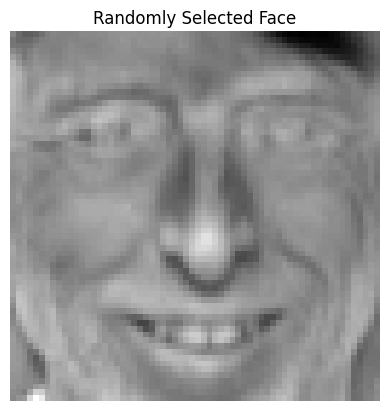

In [27]:
random_index = np.random.choice(X.shape[1])
random_face = X[:, random_index]

# Plotting the random face
plt.imshow(random_face.reshape(64, 64), cmap='gray')
plt.title("Randomly Selected Face")
plt.axis('off')
plt.show()

In [25]:
sorted_eigenvalues = lmd[sorted_indices][:260]
sorted_eigenvectors = A[:, sorted_indices[:260]]

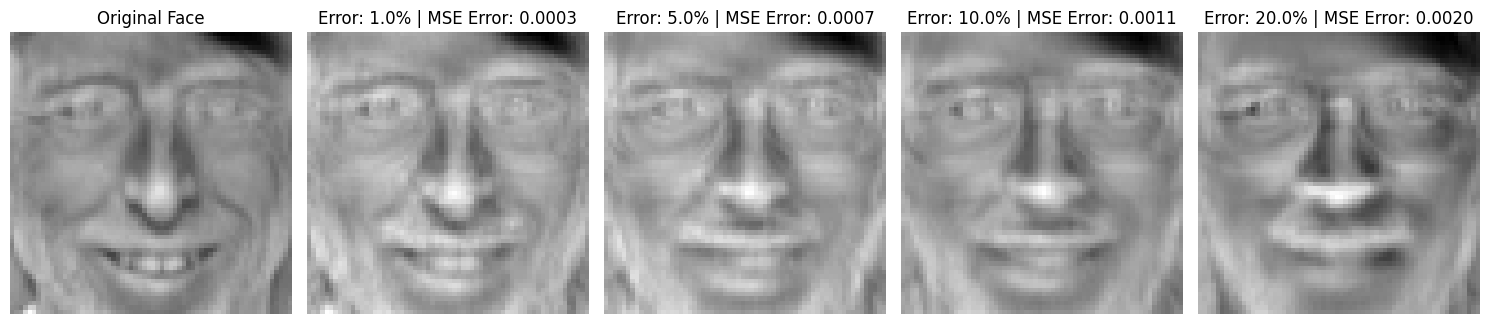

In [28]:
# Function to reconstruct the face from the compressed face
def reconstruct_face(eigenvectors, face, m):
    
    # Select the top m eigenvectors
    A_m = eigenvectors[:, :m]
    
    # Project the face onto the reduced subspace
    Y_m = np.dot(A_m.T, face)
    
    # Reconstruct the face from the reduced subspace
    face_reconstructed = np.dot(A_m, Y_m)

    error = np.mean((face - face_reconstructed)**2)
    
    return face_reconstructed, error

# Plotting the original and reconstructed faces for different values of m
plt.figure(figsize=(15, len(n_components) * 3))

plt.subplot(1, len(n_components) + 1, 1)
plt.imshow(random_face.reshape(64, 64), cmap='gray')
plt.title("Original Face")
plt.axis('off')

for idx, m in enumerate(n_components):
    face_reconstructed, mse = reconstruct_face(sorted_eigenvectors, random_face, m) 
    plt.subplot(1, len(n_components) + 1, idx + 2)
    plt.imshow(face_reconstructed.reshape(64, 64), cmap='gray')
    plt.title(f"Error: {epsilon[idx]*100}% | MSE Error: {mse:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful linear algebra technique used for dimensionality reduction, noise reduction, and data compression. It factorizes a matrix into three other matrices, capturing the essential patterns and structures in the data.

## Algorithm for SVD

Given a matrix $\mathbf{X}$ of dimensions $m \times n$, the SVD of $\mathbf{X}$ is given by:
$$
\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$
where:
- $\mathbf{U}$ is an $m \times m$ orthogonal matrix whose columns are the left singular vectors of $\mathbf{X}$.
- $\mathbf{\Sigma}$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal, known as the singular values of $\mathbf{X}$.
- $\mathbf{V}$ is an $n \times n$ orthogonal matrix whose columns are the right singular vectors of $\mathbf{X}$.

### Steps to Compute SVD

1. **Compute $\mathbf{X}^T \mathbf{X}$**:
    - Calculate the matrix $\mathbf{X}^T \mathbf{X}$, which is an $n \times n$ matrix.

2. **Eigen Decomposition of $\mathbf{X}^T \mathbf{X}$**:
    - Perform eigen decomposition on $\mathbf{X}^T \mathbf{X}$ to obtain the eigenvalues and eigenvectors.
    $$
    \mathbf{X}^T \mathbf{X} \mathbf{V} = \mathbf{V} \mathbf{\Lambda}
    $$
    where $\mathbf{V}$ is the matrix of eigenvectors and $\mathbf{\Lambda}$ is the diagonal matrix of eigenvalues.

3. **Compute Right Singular Vectors**:
    - The columns of $\mathbf{V}$ are the right singular vectors of $\mathbf{X}$.

4. **Compute Singular Values**:
    - The singular values $\sigma_i$ are the square roots of the eigenvalues $\lambda_i$.
    $$
    \sigma_i = \sqrt{\lambda_i}
    $$

5. **Compute Left Singular Vectors**:
    - The left singular vectors $\mathbf{U}$ are computed as:
    $$
    \mathbf{U} = \mathbf{X} \mathbf{V} \mathbf{\Sigma}^{-1}
    $$
    where $\mathbf{\Sigma}^{-1}$ is the inverse of the diagonal matrix $\mathbf{\Sigma}$.

### Properties of SVD

- **Rank Approximation**:
  - SVD can be used to approximate a matrix with a lower rank by truncating the singular values and corresponding singular vectors.
  - For a given rank $k$, the best rank-$k$ approximation of $\mathbf{X}$ is given by:
  $$
  \mathbf{X}_k = \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T
  $$
  where $\mathbf{U}_k$, $\mathbf{\Sigma}_k$, and $\mathbf{V}_k$ are the matrices containing the top $k$ singular values and corresponding singular vectors.

- **Energy of the Matrix**:
  - The sum of the squares of the singular values represents the total energy of the matrix.
  - The proportion of the total energy captured by the top $k$ singular values is given by:
  $$
  \text{Energy Ratio} = \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}
  $$


## Dataset-1: Random Dataset 

### Data Generation and Visualization

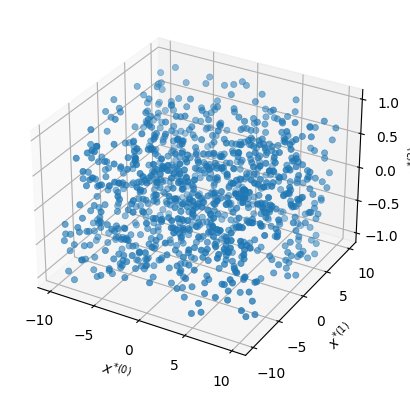

In [41]:
# Generating Data point vectors x_0 , x_1 and x_2 for dataset X.
x0 = np.random.uniform(-10, 10, 1000)
x1 = np.random.uniform(-10, 10, 1000)
x2 = np.random.uniform(-1, 1, 1000)

# Plotting dataset points in 3D scatter plot
ax = plt.axes(projection='3d')
ax.scatter(x0, x1, x2, linewidth=0.5)
ax.set_xlabel('$x ^{*(0)}$')
ax.set_ylabel('$x ^{*(1)}$')
ax.set_zlabel('$x ^{*(2)}$')

# Stacking the x_ast0 , x_ast1 and x_ast2 in X
X = np.stack((x0 , x1 ,x2))

#### Calculation of $\mathbf{U}$, $\mathbf{V}$, $\mathbf{\Sigma}$, $\mathbf{U}_r$, $\mathbf{V}_r$, $\mathbf{\Lambda}^{\frac{1}{2}}$

In [42]:
def compute_svd(X):
    """
    Compute the Singular Value Decomposition (SVD) of a matrix X.
    
    Parameters:
    - X: Input matrix of shape (m, n)
    
    Returns:
    - U: Left singular vectors (m x m)
    - Sigma: Singular values (m x n) in diagonal matrix form
    - V: Right singular vectors (n x n)
    """
    # Step 1: Compute X^T * X
    XtX = np.dot(X.T, X)
    
    # Step 2: Eigen decomposition of X^T * X to get V and eigenvalues
    eigenvalues, V = np.linalg.eig(XtX)
    
    # Step 3: Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    V = V[:, sorted_indices]
    
    # Step 4: Compute singular values (square roots of eigenvalues)
    singular_values = np.sqrt(eigenvalues)
    
    # Step 5: Compute U using the formula U = X * V * Sigma^(-1)
    Sigma_inv = np.diag(1 / singular_values)
    U = np.dot(np.dot(X, V), Sigma_inv)
    
    # Step 6: Create Sigma as a diagonal matrix
    m, n = X.shape
    #print(len(singular_values))
    
    return U, singular_values, V

In [43]:
def compute_svd_components(X, r=None):
    
    """
    Compute SVD components (U, Sigma, V), reduced components (U_r, V_r), 
    and Lambda_r for a given matrix X.

    Parameters:
    - X: Input matrix of shape (D, N)
    - r: Rank for reduction (optional). If None, use full rank of X.

    Returns:
    - U: Left singular vectors (D x D)
    - Sigma: Singular values (D x N) in diagonal matrix form
    - V: Right singular vectors (N x N)
    - Lambda_r: Diagonal matrix of top r eigenvalues (r x r)
    - U_r: Reduced left singular vectors (D x r)
    - V_r: Reduced right singular vectors (N x r)
    """
    
    # Perform full SVD decomposition
    U, s, V = compute_svd(X)
    # Create Sigma as a diagonal matrix
    D, N = X.shape
    Sigma = np.zeros((D, N))
    np.fill_diagonal(Sigma, s)

    # Determine the rank (r)
    if r is None:
        r = np.sum(s > 1e-10)  # Numerical rank threshold

    # Extract reduced components
    U_r = U[:, :r]          # First r columns of U
    V_r = V[:, :r]          # First r columns of V
    Lambda_r = np.diag(s[:r])  # Top r singular values in diagonal matrix form

    if r == 0:
        return U, Sigma, V

    return U, Sigma, V, Lambda_r, U_r, V_r

In [44]:
U, Sigma, V, Lambda_r, U_r, V_r = compute_svd_components(X, r=2)

print(f"Shape of U: {U.shape}")
print(f"Shape of Sigma: {Sigma.shape}")
print(f"Shape of V: {V.shape}")
print(f"Shape of Lambda_r: {Lambda_r.shape}")
print(f"Shape of U_r: {U_r.shape}")
print(f"Shape of V_r: {V_r.shape}")
print(f"U:\n {U}\n")
print(f"Sigma:\n {Sigma}\n")
print(f"V:\n {V}\n")
print(f"Lambda_r:\n {Lambda_r}\n")
print(f"U_r:\n {U_r}\n")
print(f"V_r:\n {V_r}")

Shape of U: (3, 1000)
Shape of Sigma: (3, 1000)
Shape of V: (1000, 1000)
Shape of Lambda_r: (2, 2)
Shape of U_r: (3, 2)
Shape of V_r: (1000, 2)
U:
 [[-8.10847067e-01+0.00000000e+00j  5.85219810e-01+0.00000000e+00j
   6.69382779e-03+0.00000000e+00j ... -8.53872121e-10-9.96429071e-09j
   1.78757513e-10-7.88065946e-10j  1.78757513e-10+7.88065946e-10j]
 [-5.85228179e-01+0.00000000e+00j -8.10868226e-01+0.00000000e+00j
   8.36031733e-04+0.00000000e+00j ... -1.74530985e-09-3.64914669e-09j
  -3.36969686e-09+8.52184594e-09j -3.36969686e-09-8.52184594e-09j]
 [-5.91707459e-03+0.00000000e+00j  3.23952277e-03+0.00000000e+00j
  -9.99977247e-01+0.00000000e+00j ... -4.85804430e-10+4.82097720e-10j
  -1.81699571e-10-4.03993538e-09j -1.81699571e-10+4.03993538e-09j]]

Sigma:
 [[185.27955288   0.           0.         ...   0.           0.
    0.        ]
 [  0.         176.42206427   0.         ...   0.           0.
    0.        ]
 [  0.           0.          18.11882002 ...   0.           0.
    0.      

C:\Users\Anirvan Krishna\AppData\Roaming\Python\Python310\site-packages\numpy\lib\index_tricks.py:916: ComplexWarning: Casting complex values to real discards the imaginary part
  a.flat[:end:step] = val


In [45]:
# Get the indices of the top 2 singular values
top_2_indices = np.argsort(Sigma.diagonal())[::-1][:2]

# Select the corresponding eigenvectors from U
top_2_eigenvectors = U[:, top_2_indices]

print(f"Top 2 Singular Values:\n {Sigma.diagonal()[top_2_indices]}\n")
print(f"Top 2 Dominant Eigenvectors:\n {top_2_eigenvectors}")

Top 2 Singular Values:
 [185.27955288 176.42206427]

Top 2 Dominant Eigenvectors:
 [[-0.81084707+0.j  0.58521981+0.j]
 [-0.58522818+0.j -0.81086823+0.j]
 [-0.00591707+0.j  0.00323952+0.j]]


### Projection on 2D Eigenspace

The projection of data points onto the subspace spanned by two principal eigenvectors can be represented as:

Given point set $\mathbf{X} \in \mathbb{R}^{N\times1}$ and two dominant eigenvectors $\mathbf{v}_1, \mathbf{v}_2$:

1. Project onto 2D subspace:
    $$\mathbf{X}_{\text{proj}} = [\mathbf{v}_1 \; \mathbf{v}_2]^T \mathbf{X}$$

2. Each projected point $\mathbf{y}_i$ has coordinates:
    $$y_{i1} = \mathbf{v}_1^T \mathbf{x}_i$$
    $$y_{i2} = \mathbf{v}_2^T \mathbf{x}_i$$

The projection preserves the maximum variance in the data along these principal directions while reducing dimensionality from $N$-D to 2-D.
```

C:\Users\Anirvan Krishna\AppData\Roaming\Python\Python310\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


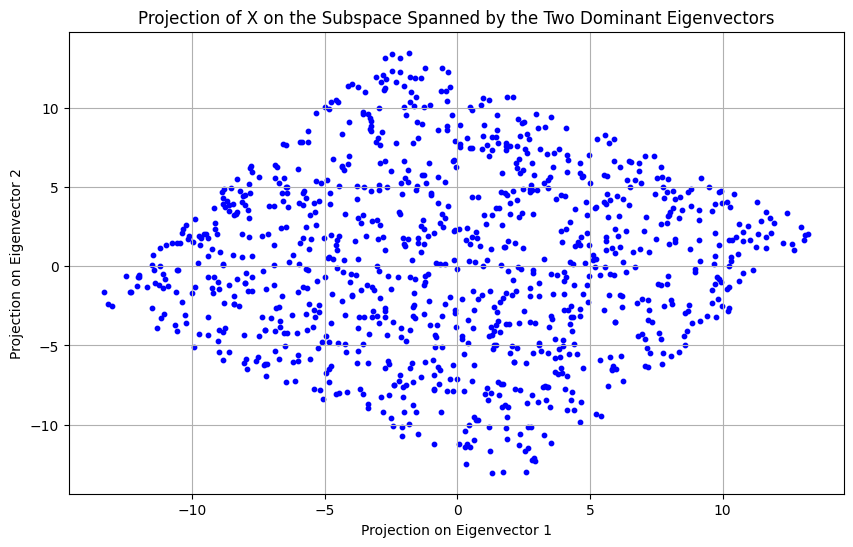

In [46]:
# Projecting the data onto the subspace spanned by the two dominant eigenvectors
X_projected = np.dot(top_2_eigenvectors.T, X)

# Plotting the projected data
plt.figure(figsize=(10, 6))
plt.scatter(X_projected[0, :], X_projected[1, :], s=10, color='blue')
plt.title("Projection of X on the Subspace Spanned by the Two Dominant Eigenvectors")
plt.xlabel("Projection on Eigenvector 1")
plt.ylabel("Projection on Eigenvector 2")
plt.grid(True)
plt.show()

#### Pairwise Euclidean Distance Matrix

In [47]:
from scipy.spatial import distance_matrix

# Randomly select 10 points from X
random_indices = np.random.choice(X.shape[1], 10, replace=False)
selected_points = X[:, random_indices]

# Compute the pairwise Euclidean distance matrix
pairwise_distances = distance_matrix(selected_points.T, selected_points.T)

print("For Original Dataset")
print("_"*100)
print("Selected Points:\n", selected_points)
print("\nPairwise Euclidean Distance Matrix:\n", pairwise_distances, "\n")

# Randomly select 10 points from X_projected
A_r = np.dot(Lambda_r, V_r.T)
selected_points_projected = A_r[:, random_indices]

# Compute the pairwise Euclidean distance matrix
pairwise_distances_projected = distance_matrix(selected_points_projected.T, selected_points_projected.T)

print("For Projected Dataset")
print("_"*100)
print("Selected Points:\n", selected_points_projected)
print("\nPairwise Euclidean Distance Matrix:\n", pairwise_distances_projected)

For Original Dataset
____________________________________________________________________________________________________
Selected Points:
 [[ 7.09643079  0.53316306  0.10151284  9.74806485  7.28857005 -5.90036733
  -3.54285262 -4.15953741 -3.8594624   3.20858006]
 [ 7.90507489 -5.57761701 -7.21473192  7.82425026  4.35888739  0.76269465
   2.89370045  5.76634595 -5.52450679 -9.52952887]
 [-0.3832787   0.11855612  0.04430331 -0.13089499  0.28736969  0.3198599
  -0.33328425 -0.61511386  0.68151594  0.3360231 ]]

Pairwise Euclidean Distance Matrix:
 [[ 0.         15.00370962 16.66494109  2.66484397  3.61415724 14.84670875
  11.76055801 11.45970021 17.36430382 17.87730926]
 [15.00370962  0.          1.69469189 16.26612084 12.01657777  9.0349537
   9.41176302 12.29817893  4.42887151  4.77731675]
 [16.66494109  1.69469189  0.         17.86778233 13.62576738  9.98688298
  10.75194759 13.67844154  4.35341542  3.88551825]
 [ 2.66484397 16.26612084 17.86778233  0.          4.26998827 17.17388067

#### Difference Norm: $||\mathbf{D} - \mathbf{\hat{D}}||_2$

In [48]:
np.linalg.norm(pairwise_distances_projected - pairwise_distances, 'fro')

0.2702161228182305

## Dataset-2: Olivetti Face Dataset

### Estimation of $\mathbf{U}_r, \mathbf{\Lambda}^{\frac{1}{2}}, \mathbf{V}_r$

In [49]:
rng = RandomState(0)

faces, _ = fetch_olivetti_faces(return_X_y=True,
                                shuffle=True, random_state=rng)
n_samples, n_features = faces.shape
X = faces.reshape(n_samples, n_features).T

In [50]:
U, Sigma, V, Lambda_r, U_r, V_r = compute_svd_components(X, 5)
print(f"Shape of U: {U.shape}")
print(f"Shape of Sigma: {Sigma.shape}")
print(f"Shape of V: {V.shape}")
print(f"Shape of Lambda_r: {Lambda_r.shape}")
print(f"Shape of U_r: {U_r.shape}")
print(f"Shape of V_r: {V_r.shape}")

Shape of U: (4096, 400)
Shape of Sigma: (4096, 400)
Shape of V: (400, 400)
Shape of Lambda_r: (5, 5)
Shape of U_r: (4096, 5)
Shape of V_r: (400, 5)


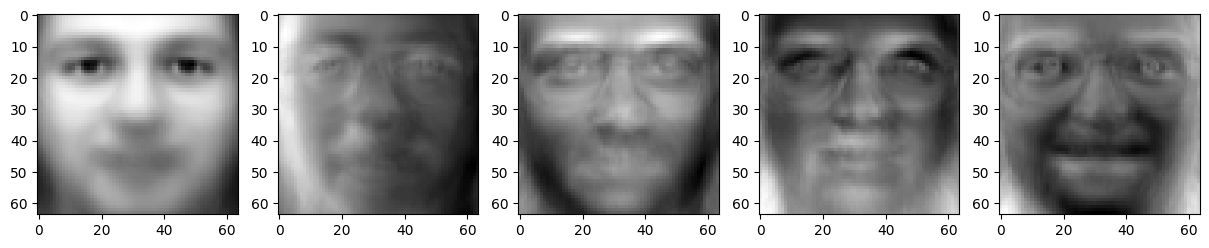

In [51]:
plt.figure(figsize=(15, 6))
for i in range(U_r.shape[1]):
    plt.subplot(1, U_r.shape[1], i + 1)
    plt.imshow(U_r.T[i].reshape(64, 64), cmap='gray')


#### Data Compression and Recovery

In [52]:
def find_components_for_error(U, Sigma, V, error_threshold):
    """
    Find the minimum number of components needed to achieve a reconstruction error below the threshold.
    
    Parameters:
    - U: Left singular vectors
    - Sigma: Singular values in diagonal matrix form
    - V: Right singular vectors
    - error_threshold: Maximum allowable reconstruction error (between 0 and 1)
    
    Returns:
    - n_components: Number of components needed
    - actual_error: Actual reconstruction error achieved
    """
    # Get singular values
    singular_values = np.diag(Sigma)
    
    # Calculate total energy (sum of squared singular values)
    total_energy = np.sum(singular_values**2)
    
    # Calculate cumulative energy ratio
    cumulative_energy_ratio = np.cumsum(singular_values**2) / total_energy
    
    # Find minimum number of components needed
    n_components = np.argmax(cumulative_energy_ratio >= (1 - error_threshold)) + 1
    
    # Calculate actual error achieved
    actual_error = 1 - cumulative_energy_ratio[n_components-1]
    
    return n_components, actual_error

# Example usage:
error_thresholds = [0.001, 0.01, 0.05, 0.1, 0.2]
for threshold in error_thresholds:
    n_comp, actual_err = find_components_for_error(U, Sigma, V, threshold)
    print(f"For {threshold*100}% error threshold:")
    print(f"  Components needed: {n_comp}")
    print(f"  Actual error: {actual_err*100:.2f}%\n")

For 0.1% error threshold:
  Components needed: 219
  Actual error: 0.10%

For 1.0% error threshold:
  Components needed: 34
  Actual error: 0.99%

For 5.0% error threshold:
  Components needed: 1
  Actual error: 4.57%

For 10.0% error threshold:
  Components needed: 1
  Actual error: 4.57%

For 20.0% error threshold:
  Components needed: 1
  Actual error: 4.57%



In [53]:
def reconstruct_from_svd(U, Sigma, V, n_components=None):
    """
    Reconstruct data matrix from SVD components.
    
    Parameters:
    - U: Left singular vectors
    - Sigma: Singular values in diagonal matrix form
    - V: Right singular vectors
    - n_components: Number of components to use for reconstruction (default: all)
    
    Returns:
    - X_reconstructed: Reconstructed data matrix
    """
    if n_components is None:
        n_components = min(U.shape[1], V.shape[1])
    
    # Get the reduced components
    U_r = U[:, :n_components]
    Sigma_r = Sigma[:n_components, :n_components]
    V_r = V[:, :n_components]
    
    # Reconstruct the data matrix
    X_reconstructed = np.dot(U_r, np.dot(Sigma_r, V_r.T))
    
    return X_reconstructed

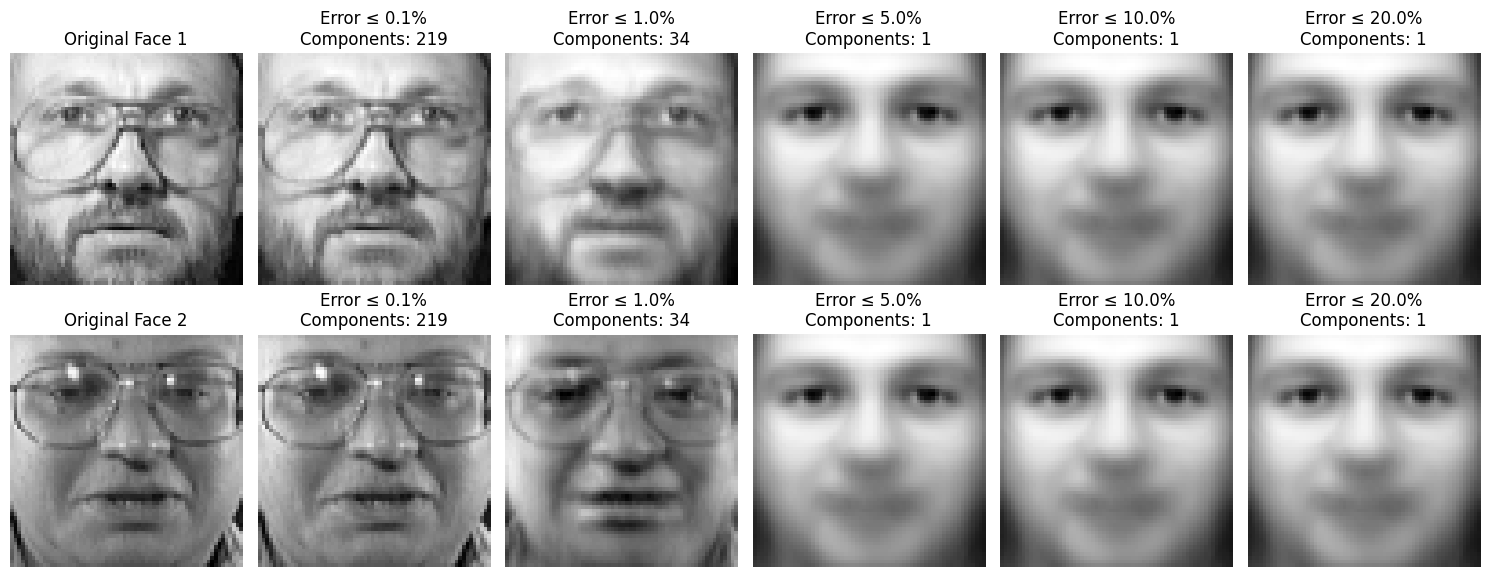

In [54]:
# First perform SVD on the sample faces
U_samples, singular_values_samples, V_samples = compute_svd(X)

# Create Sigma matrix for samples
Sigma_samples = np.zeros((U_samples.shape[0], V_samples.shape[0]))
np.fill_diagonal(Sigma_samples, singular_values_samples)

# Find components needed for different error thresholds
error_thresholds = [0.001, 0.01, 0.05, 0.1, 0.2]
reconstructed_image_1 = []
reconstructed_image_2 = []
n_comps = []
reconstructed_X = []

# Reconstruct images with different number of components
for threshold in error_thresholds:
    n_comp, _ = find_components_for_error(U_samples, Sigma_samples, V_samples, threshold)
    reconstructed = reconstruct_from_svd(U_samples, Sigma_samples, V_samples, n_comp)
    reconstructed_X.append(reconstructed)
    n_comps.append(n_comp)
    reconstructed_image_1.append(reconstructed[:, 0])
    reconstructed_image_2.append(reconstructed[:, 1])

# Plot the original and reconstructed images
plt.figure(figsize=(15, 6))

# Plot first sample
plt.subplot(2, 6, 1)
plt.imshow(X[:, 0].reshape(64, 64), cmap='gray')
plt.title('Original Face 1')
plt.axis('off')

for i, recon in enumerate(reconstructed_image_1):
    plt.subplot(2, 6, i + 2)
    plt.imshow(recon.reshape(64, 64), cmap='gray')
    plt.title(f'Error ≤ {error_thresholds[i]*100}%\nComponents: {n_comps[i]}')
    plt.axis('off')

# Plot second sample
plt.subplot(2, 6, 7)
plt.imshow(X[:, 1].reshape(64, 64), cmap='gray')
plt.title('Original Face 2')
plt.axis('off')

for i, recon in enumerate(reconstructed_image_2):
    plt.subplot(2, 6, i + 8)
    plt.imshow(recon.reshape(64, 64), cmap='gray')
    plt.title(f'Error ≤ {error_thresholds[i]*100}%\nComponents: {n_comps[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Norm Comparision

In [55]:
orig = np.linalg.norm(X, 'fro')
print(f"Original norm: {orig}")

for i, comp in enumerate(n_comps[:3]):
    reconstructed_norm = np.linalg.norm(reconstructed_X[i])
    print(f"Reconstructed norm for {comp} components = {reconstructed_norm}")

Original norm: 734.1991577148438
Reconstructed norm for 219 components = 733.844617971875
Reconstructed norm for 34 components = 730.5749719387542
Reconstructed norm for 1 components = 717.2214441640475


#### Search Time Comparision

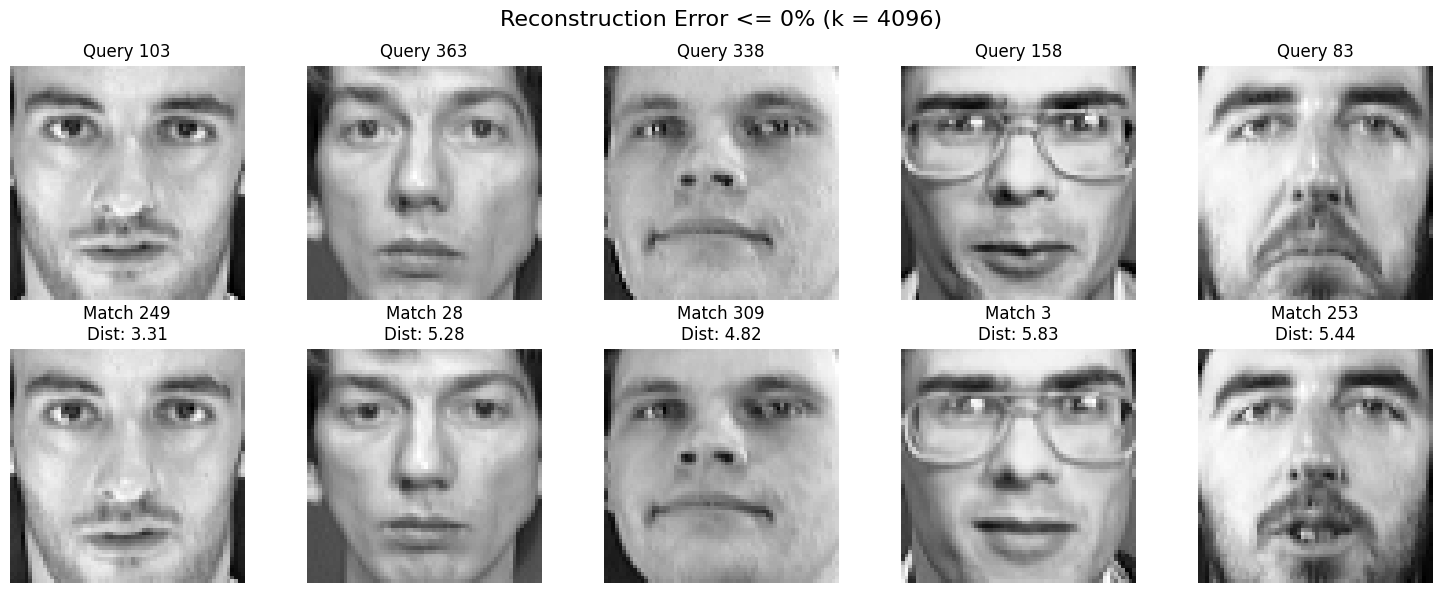

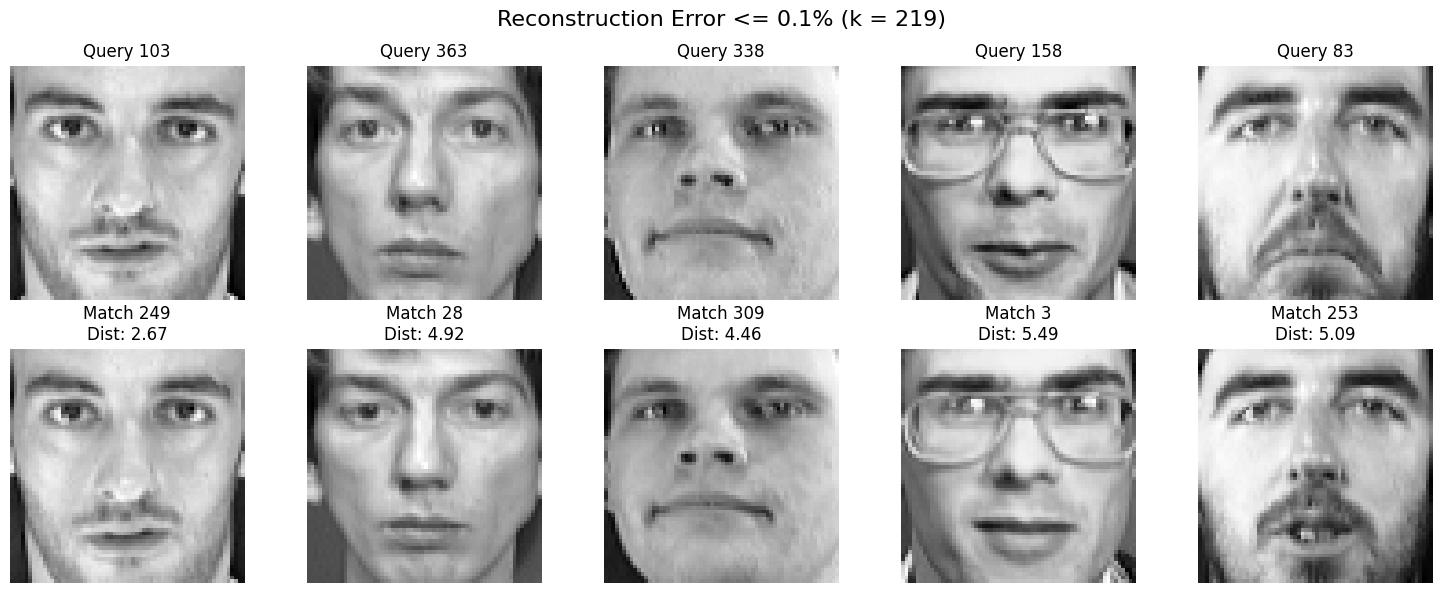

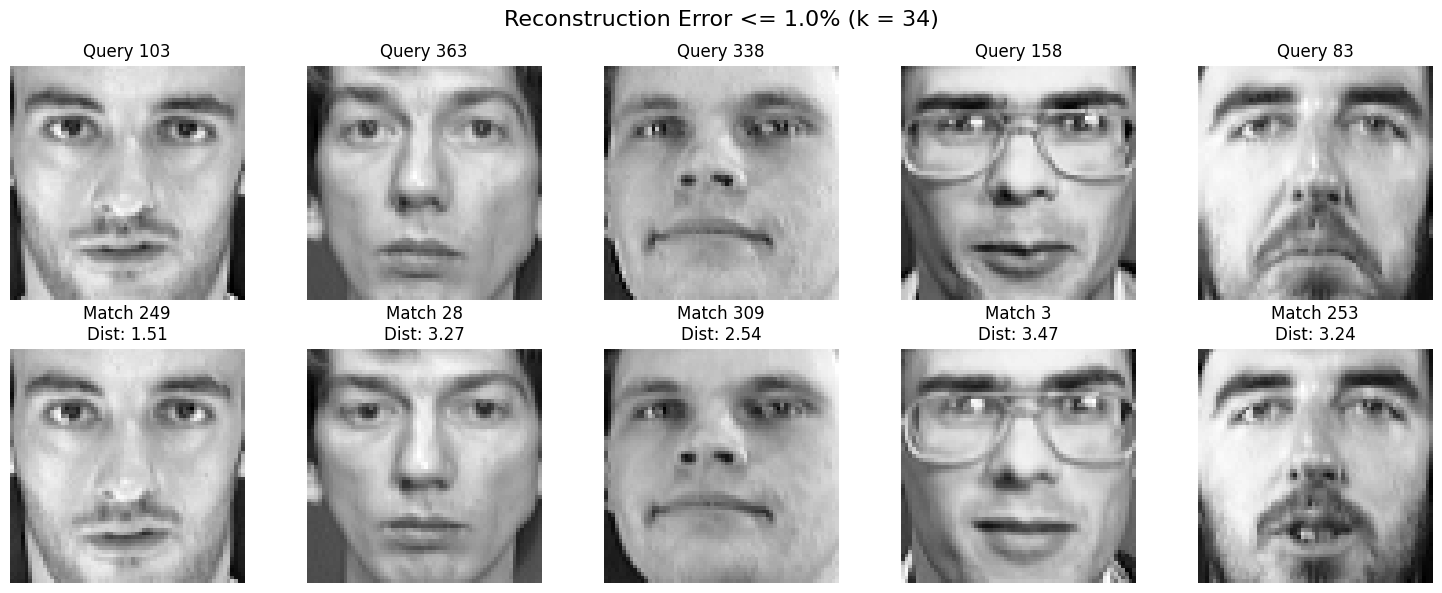

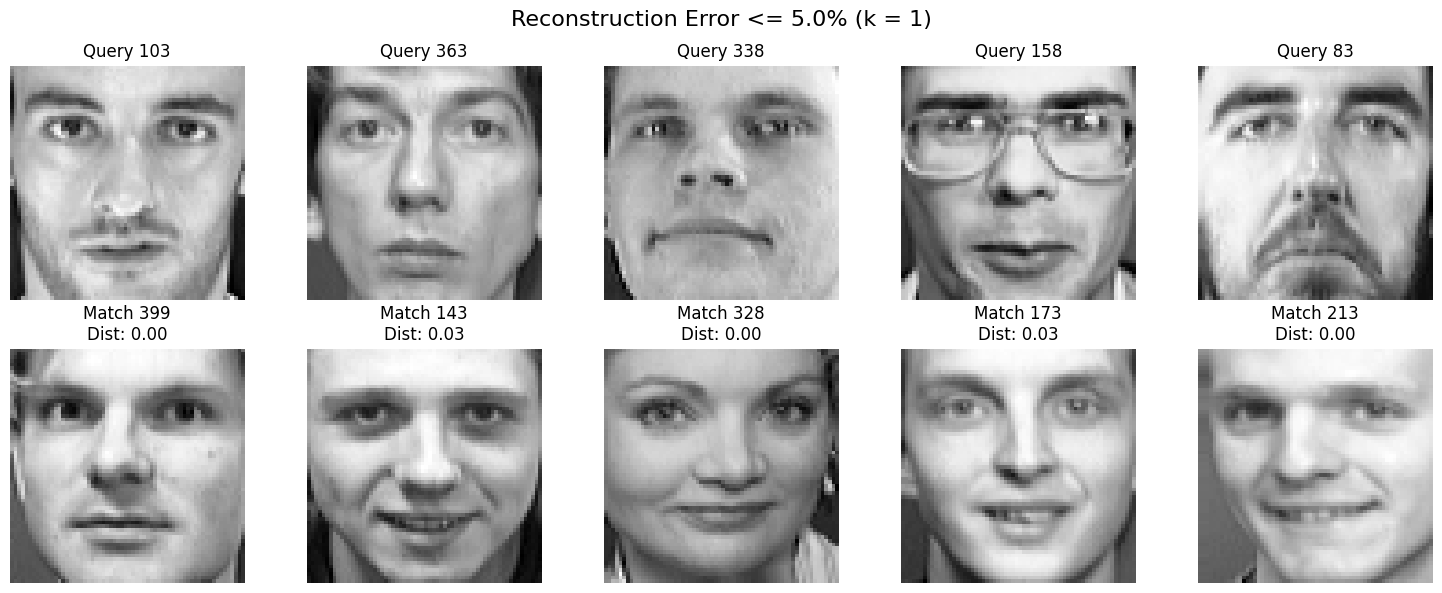

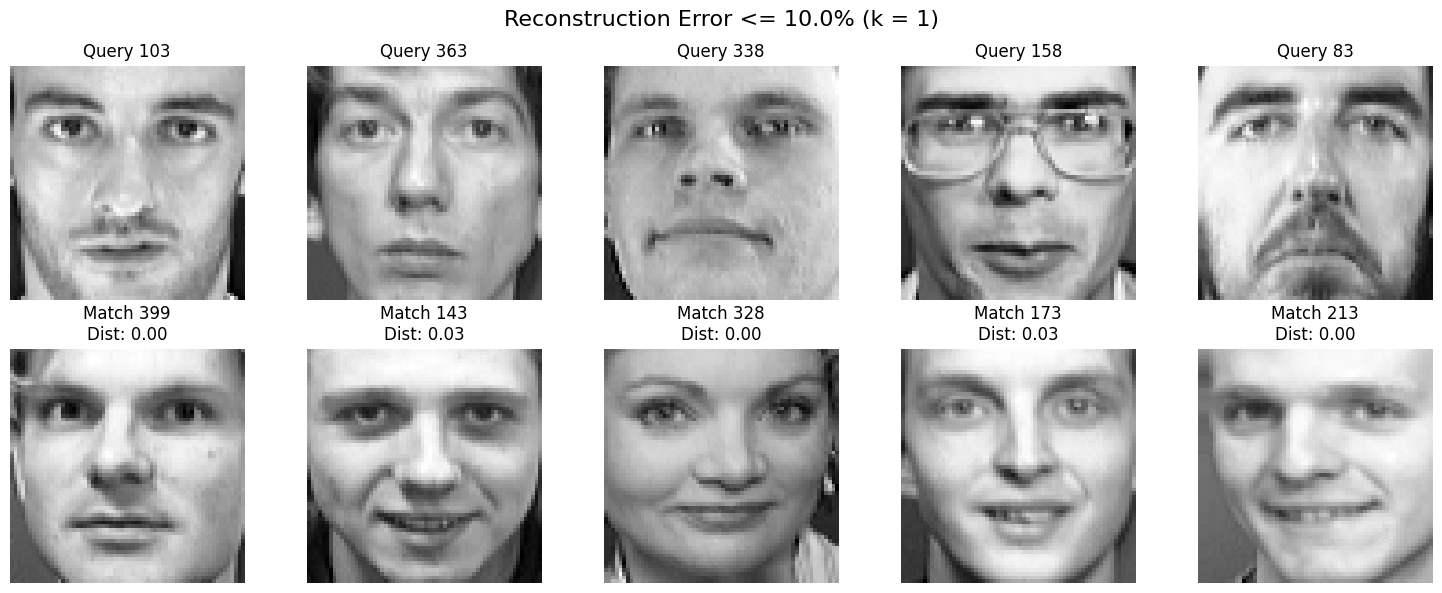

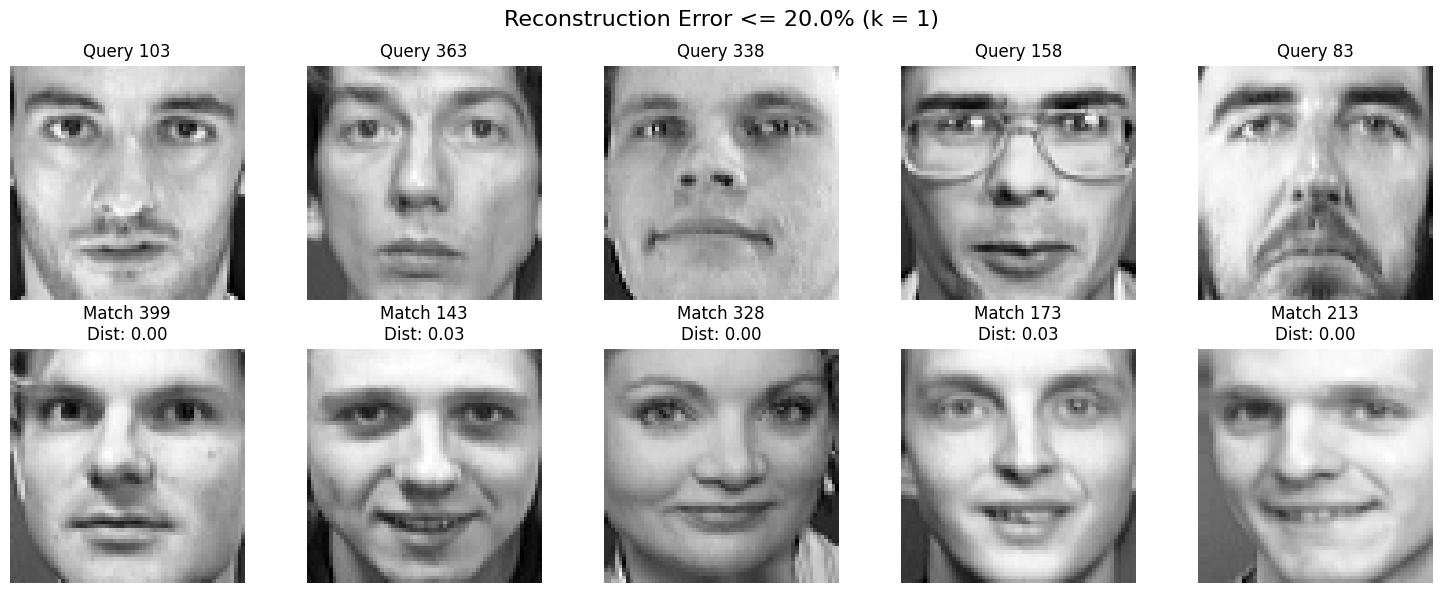


Computation Time Summary:
--------------------------------------------------
Components | Time (seconds)
--------------------------------------------------
   4096    |    0.0663    
   219     |    0.0648    
    34     |    0.0509    
    1      |    0.0384    
    1      |    0.1089    
    1      |    0.0692    
--------------------------------------------------


In [58]:
import time
from scipy.spatial.distance import euclidean

def find_closest_neighbor(query, 
                          search_space):
    min_dist = float('inf')
    min_idx = -1
    for i in range(search_space.shape[1]):
        dist = euclidean(query, search_space[:, i])
        if dist < min_dist:
            min_dist = dist
            min_idx = i
    return min_idx, min_dist

# Function to perform the entire search and measure time
def perform_search(X, 
                   query_indices, 
                   error_thresholds, 
                   U_samples, 
                   V_samples, 
                   Sigma_samples, 
                   n_comps):
    
    results_time = []  # To store time measurements for different errors

    for error_idx, k in enumerate(n_comps):
        # Compute reduced representation
        start_reduction_time = time.perf_counter()
        Uk = U_samples[:, :k]
        V_k = V_samples[:, :k]
        Sigma_k = Sigma_samples[:, :k]
        Ak = np.dot(Sigma_k, V_k.T)
        end_reduction_time = time.perf_counter()

        # Reduced query and search space
        query_images = Ak[:, query_indices]
        search_indices = np.array(
            [i for i in range(X.shape[1]) if i not in query_indices])
        search_space = Ak[:, search_indices]

        # Measure time taken for nearest-neighbor search
        start_search_time = time.perf_counter()
        results = []
        for i in range(5):
            closest_idx, closest_distance = find_closest_neighbor(
                query_images[:, i], search_space)
            results.append((search_indices[closest_idx], closest_distance))
        end_search_time = time.perf_counter()

        # Total time spent on reduction and search
        total_time = (end_reduction_time - start_reduction_time) + \
            (end_search_time - start_search_time)

        # Store computation times
        results_time.append((k, total_time))

        # Visualize results
        plt.figure(figsize=(15, 6))
        for i in range(5):
            # Plot query image
            plt.subplot(2, 5, i + 1)
            plt.imshow(X[:, query_indices[i]].reshape(64, 64), cmap='gray')
            plt.title(f'Query {query_indices[i]}')
            plt.axis('off')

            # Plot closest match
            plt.subplot(2, 5, i + 6)
            plt.imshow(X[:, results[i][0]].reshape(64, 64), cmap='gray')
            plt.title(f'Match {results[i][0]}\nDist: {results[i][1]:.2f}')
            plt.axis('off')

        plt.suptitle(
            f'Reconstruction Error <= {error_thresholds[error_idx] * 100}% (k = {k})', fontsize=16)
        plt.tight_layout()
        plt.show()

    return results_time

# Define your error thresholds and number of components (n_comps)
error_thresholds = [0, 0.001, 0.01, 0.05, 0.1, 0.2]
n_comps = [len(Sigma_samples)] + n_comps if n_comps[0] != len(Sigma_samples) else n_comps

# Consistent random query selection
query_indices = np.random.choice(X.shape[1], 5, replace=False)
results_time = perform_search(
    X, query_indices, error_thresholds, U_samples, V_samples, Sigma_samples, n_comps)

# Print computation times in a tabulated form
print("\nComputation Time Summary:")
print("-" * 50)
print("Components | Time (seconds)")
print("-" * 50)
for (k, time_taken) in results_time:
    print(f"{k:^10d} | {time_taken:^13.4f}")
print("-" * 50)

Text(0.5, 0, 'Number of Components')

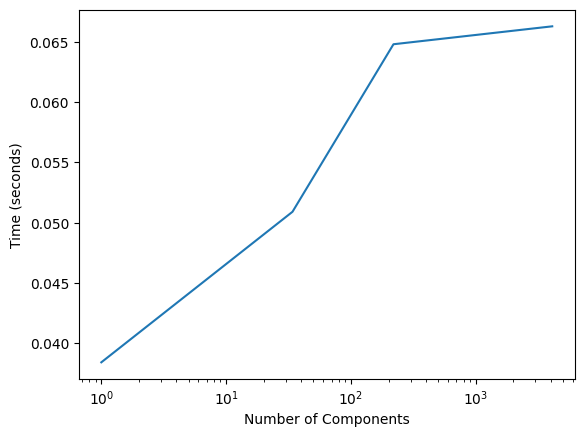

In [63]:
K = []
time = []
for (k, time_taken) in results_time:
    K.append(k)
    time.append(time_taken)
    if(k==1):
        break
plt.plot(K, time)
plt.xscale('log')
plt.ylabel('Time (seconds)')
plt.xlabel('Number of Components')

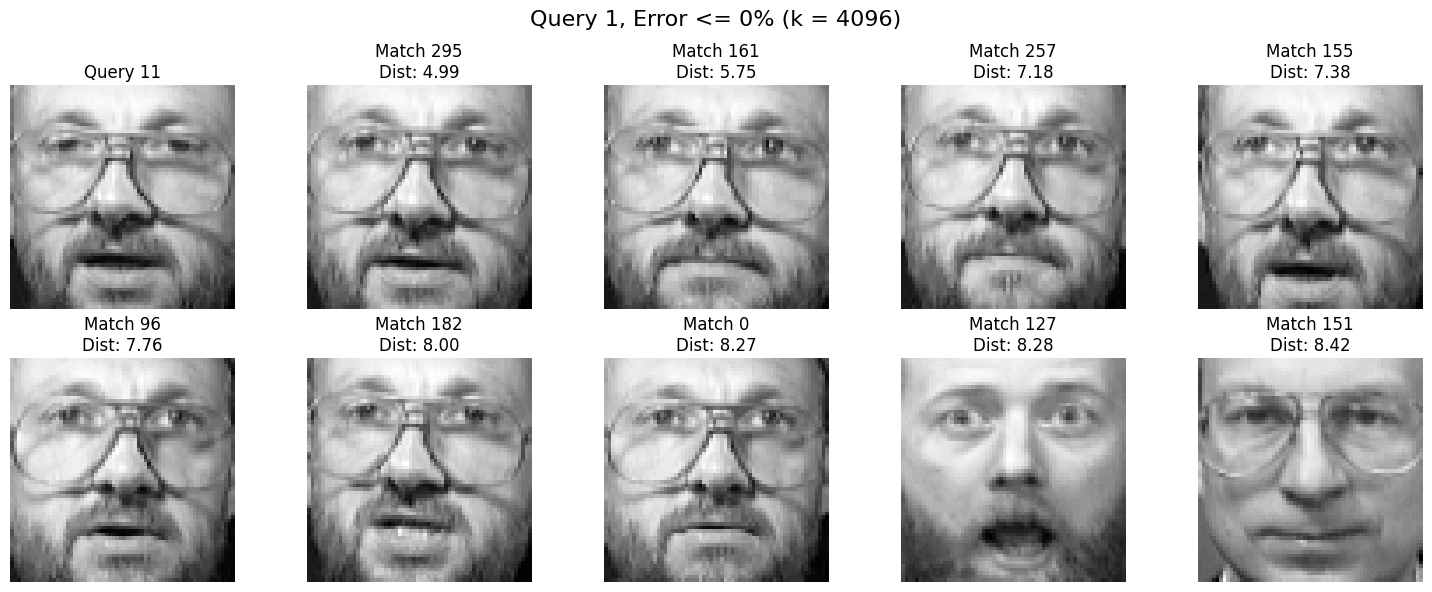

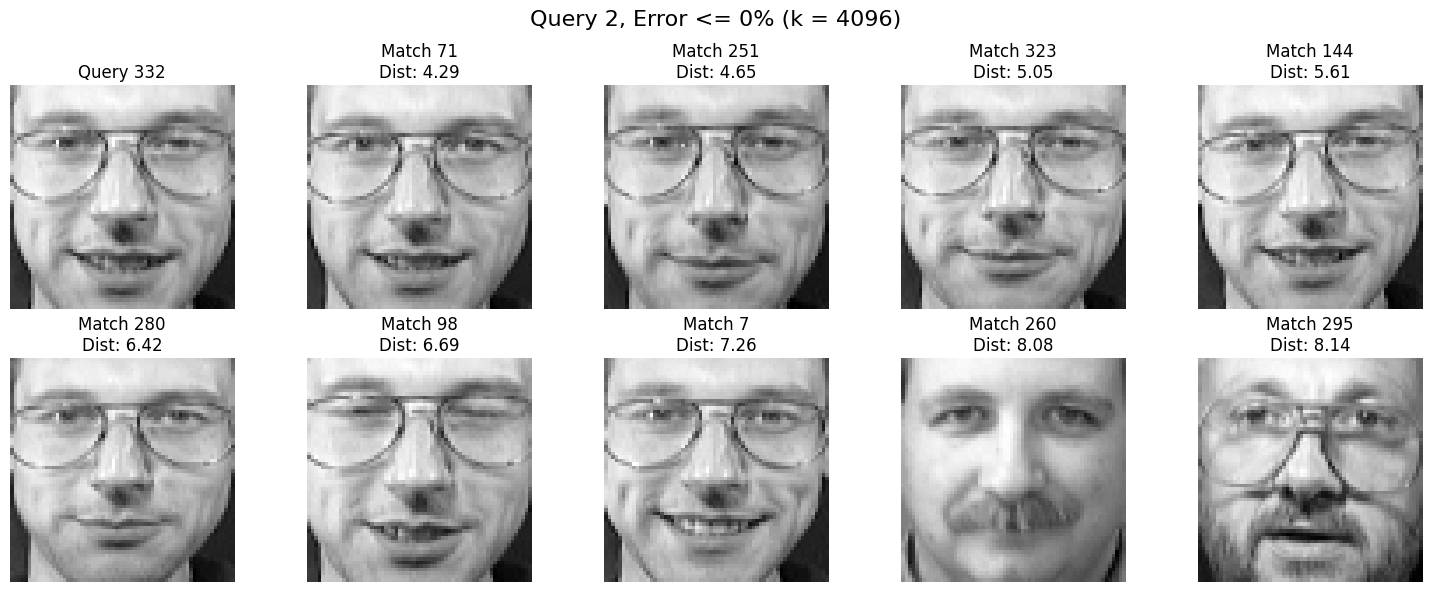

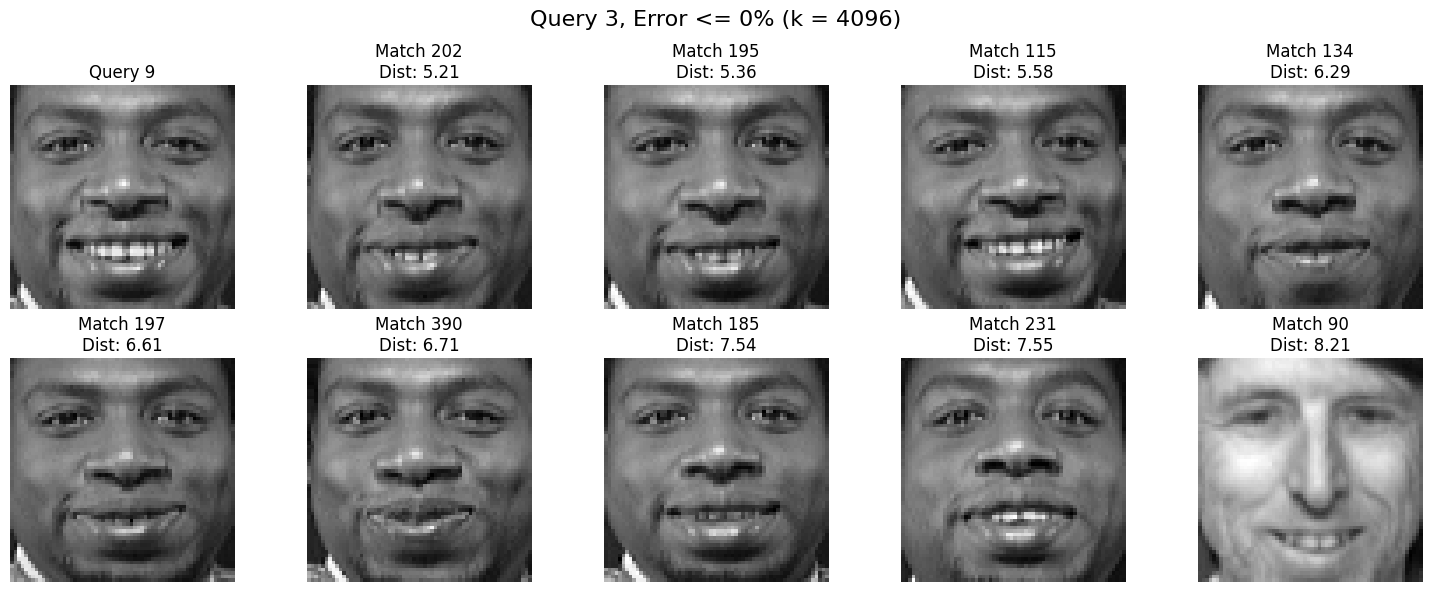

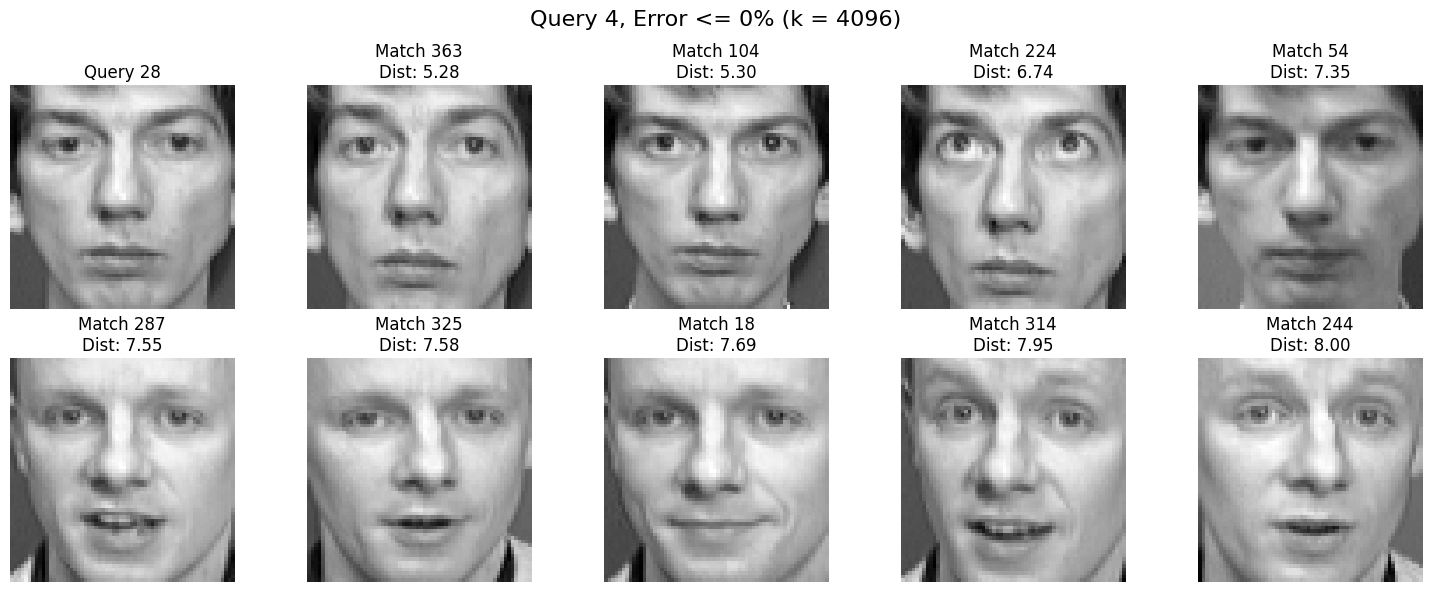

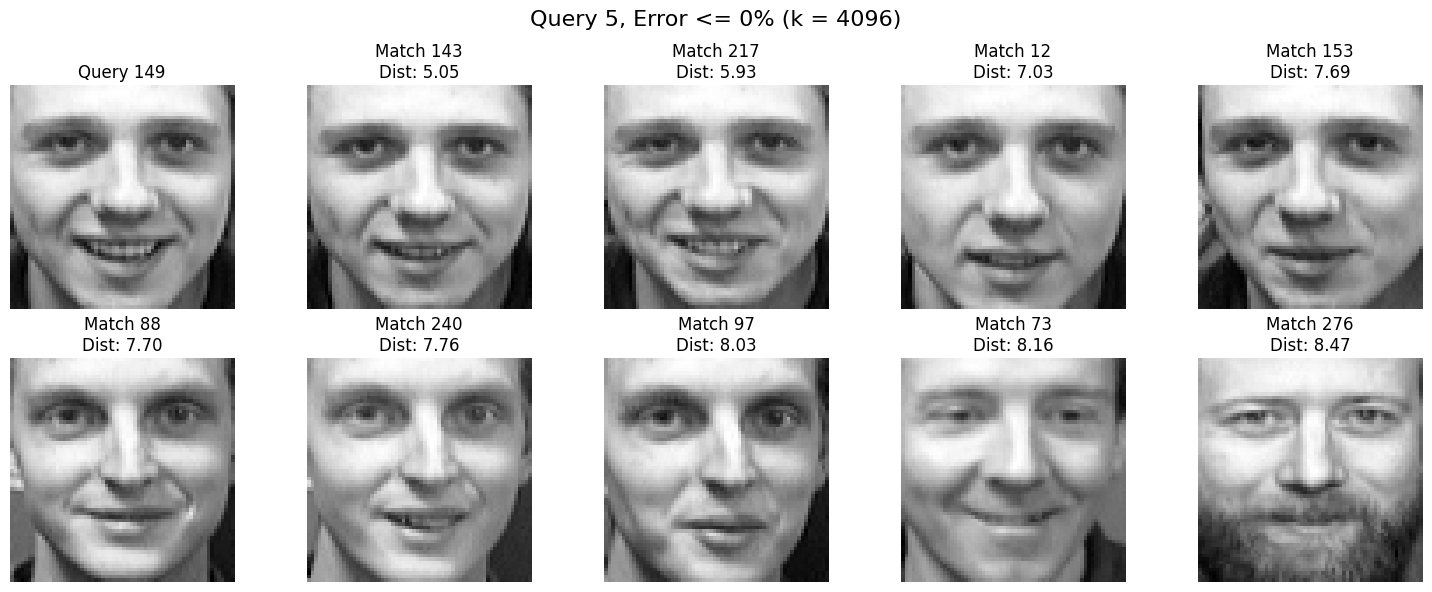

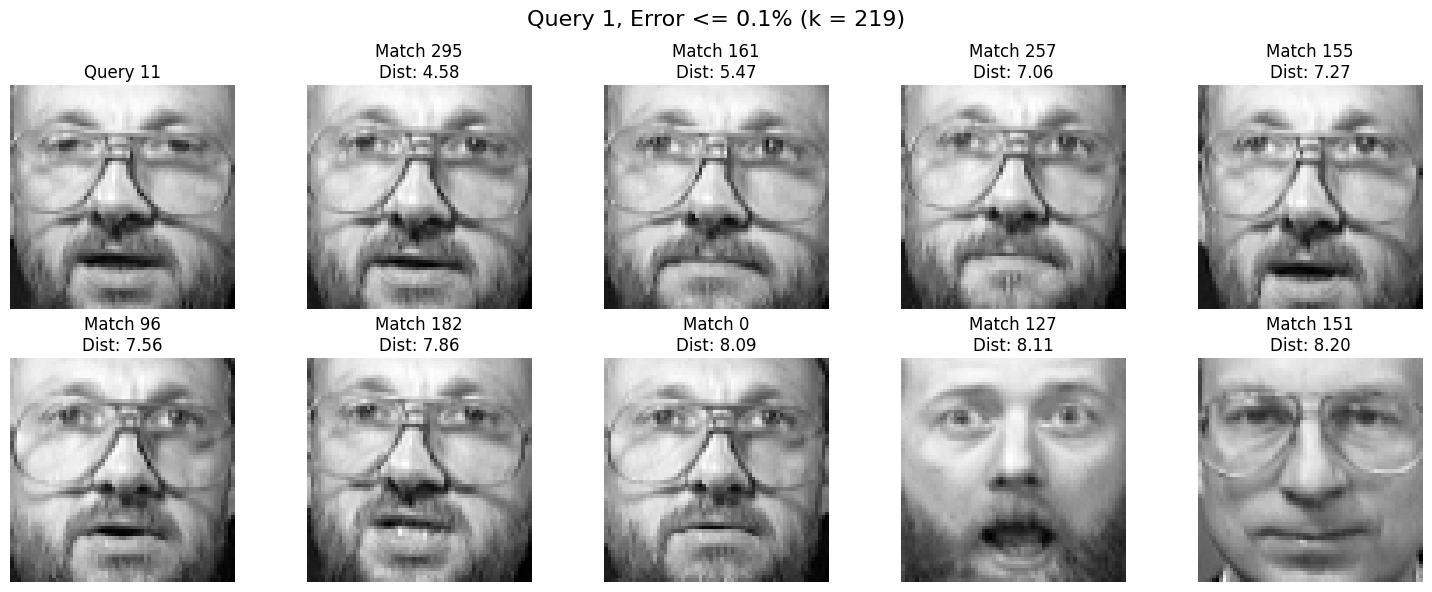

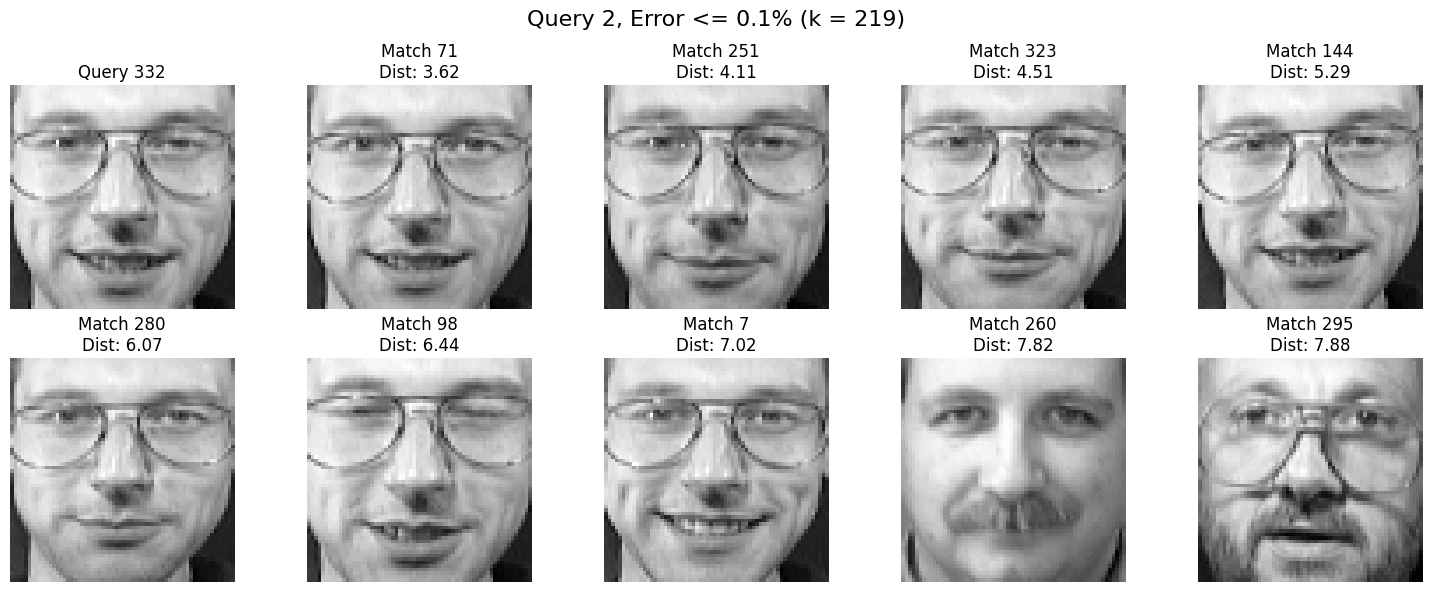

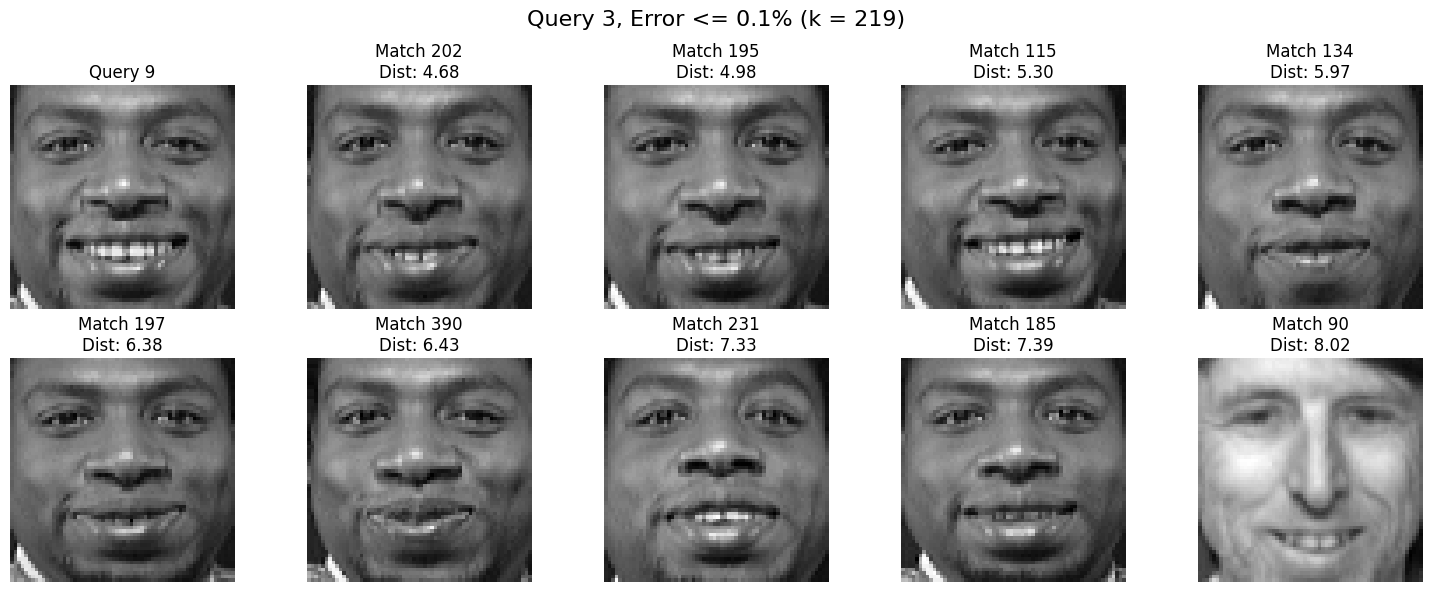

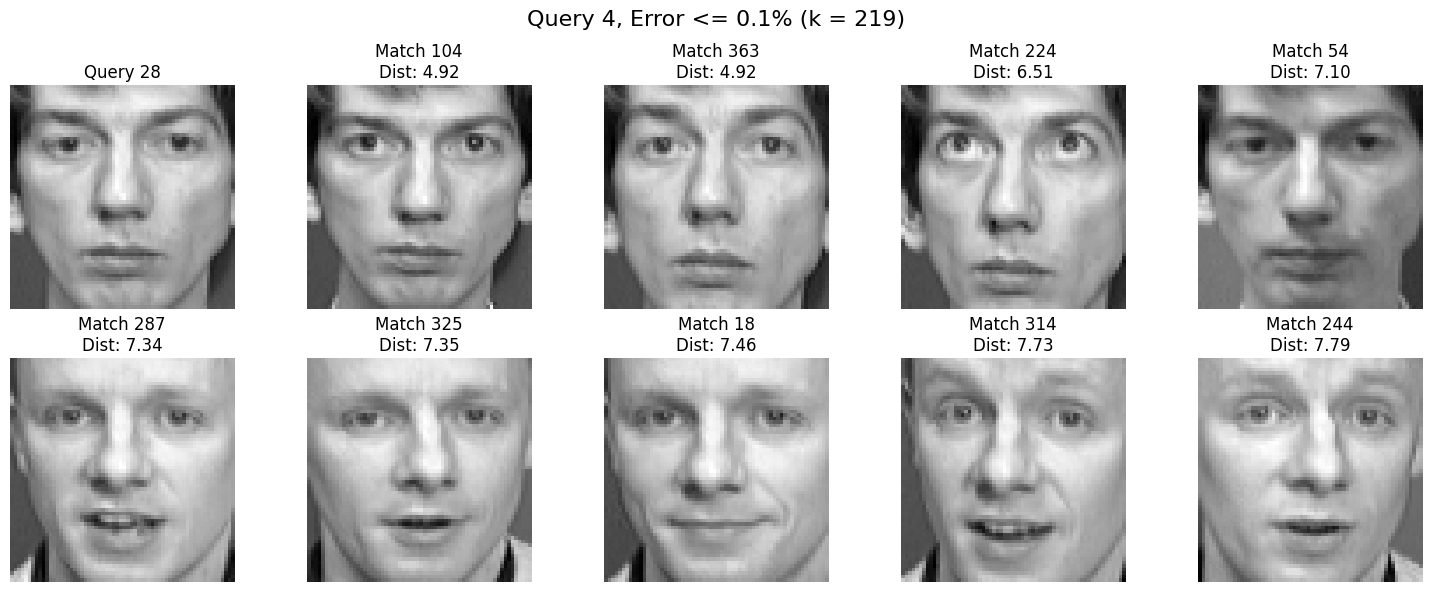

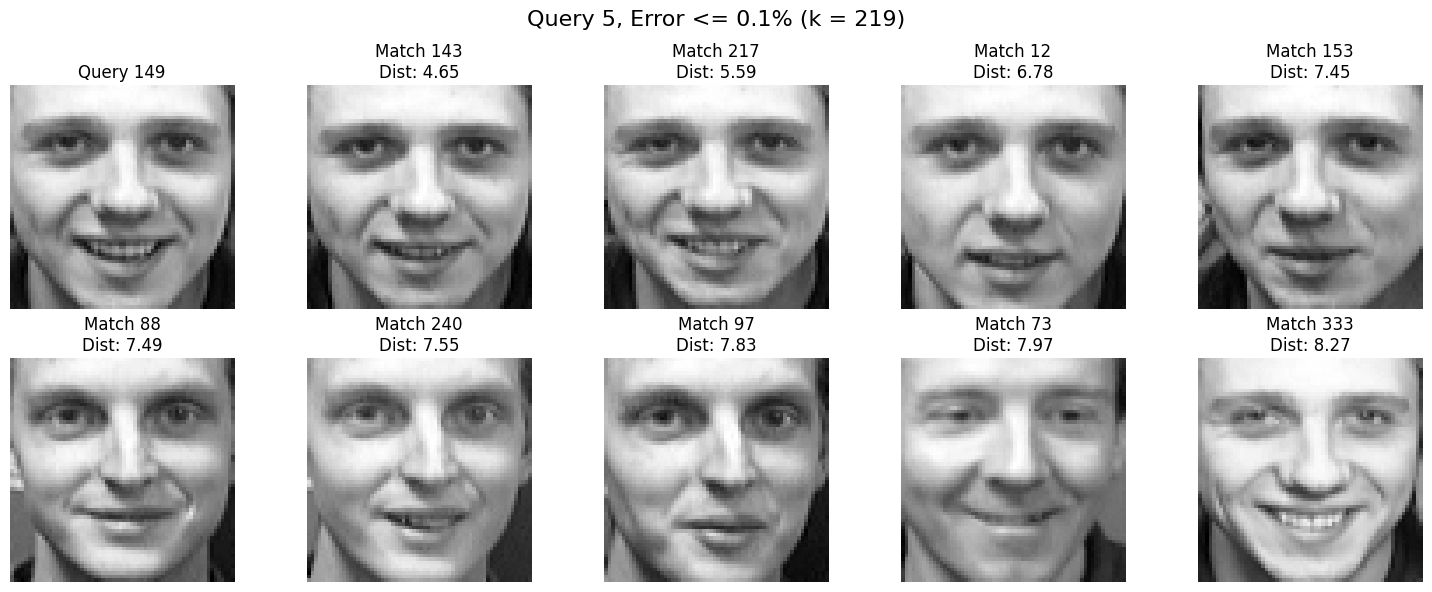

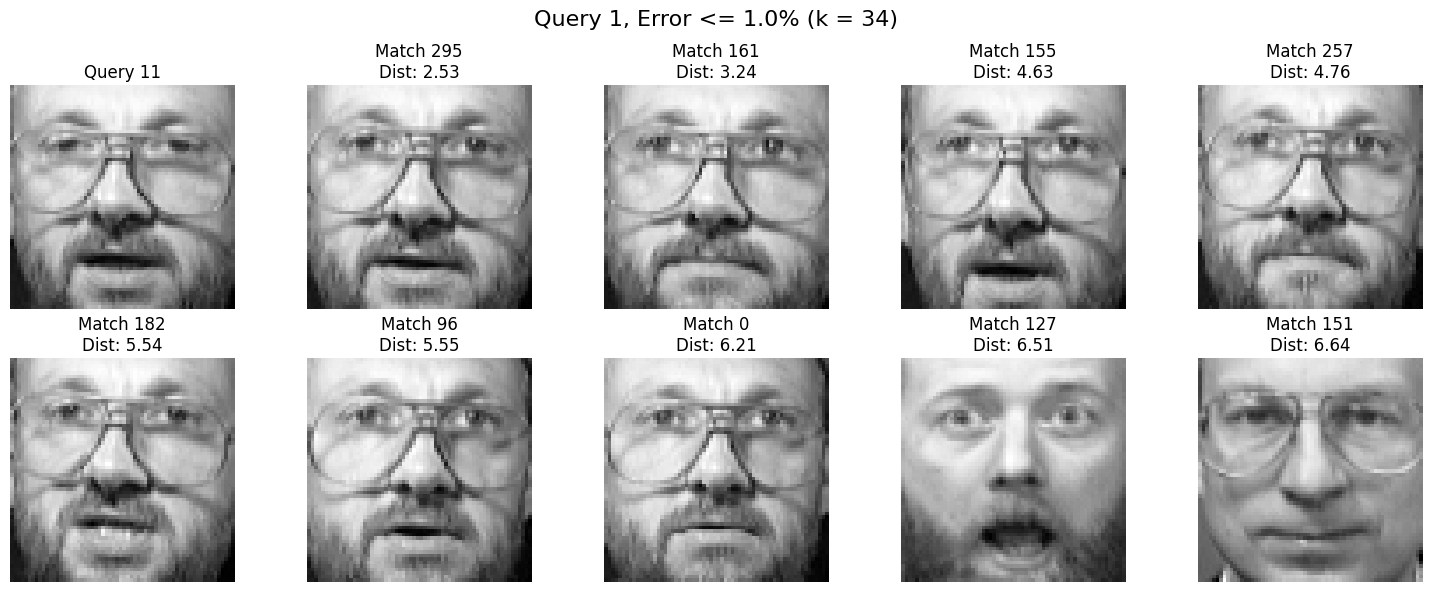

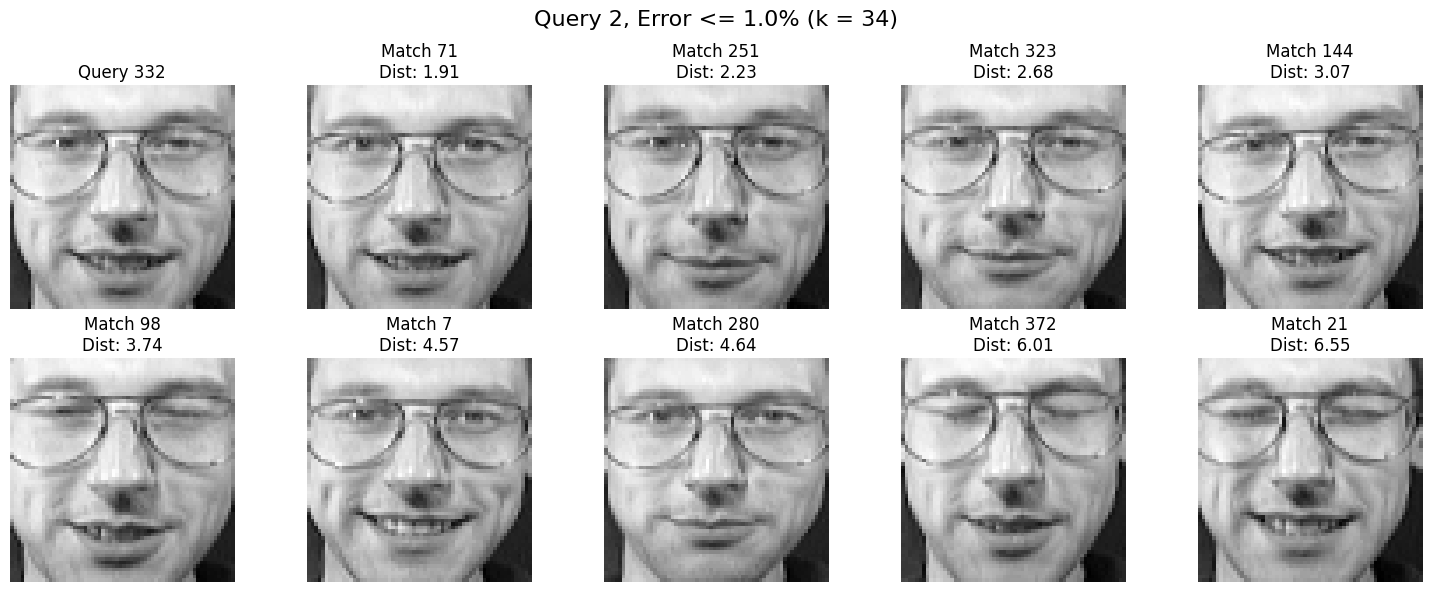

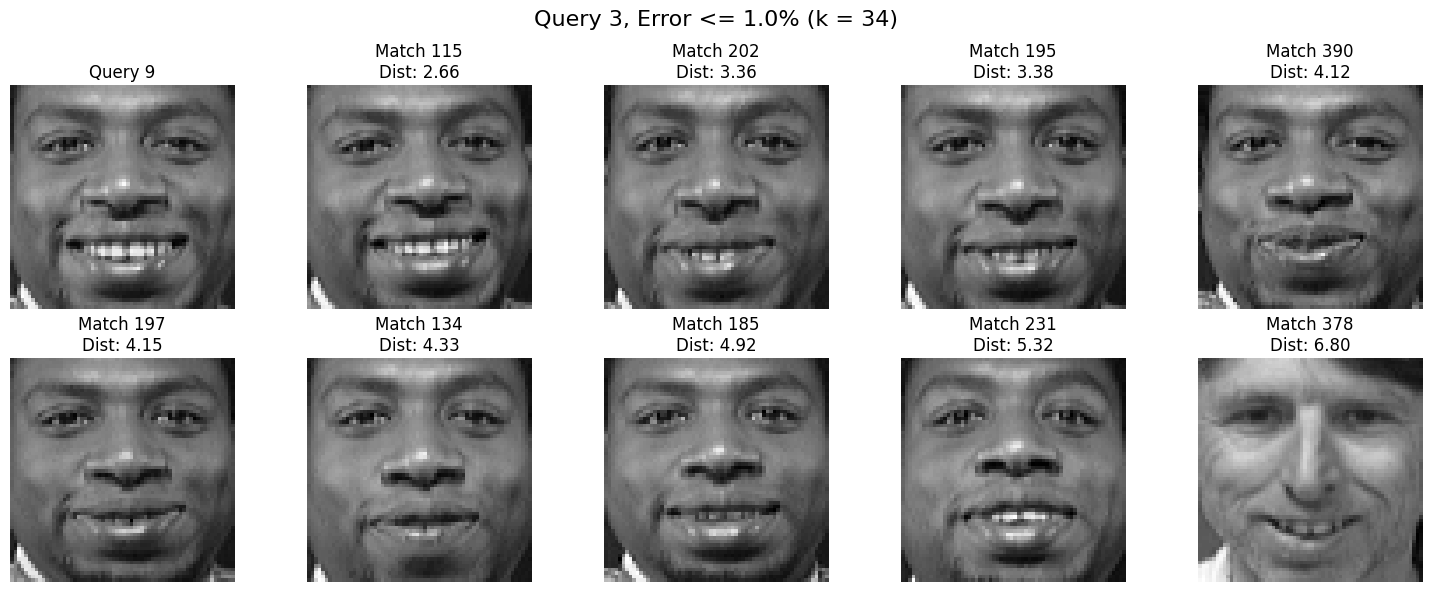

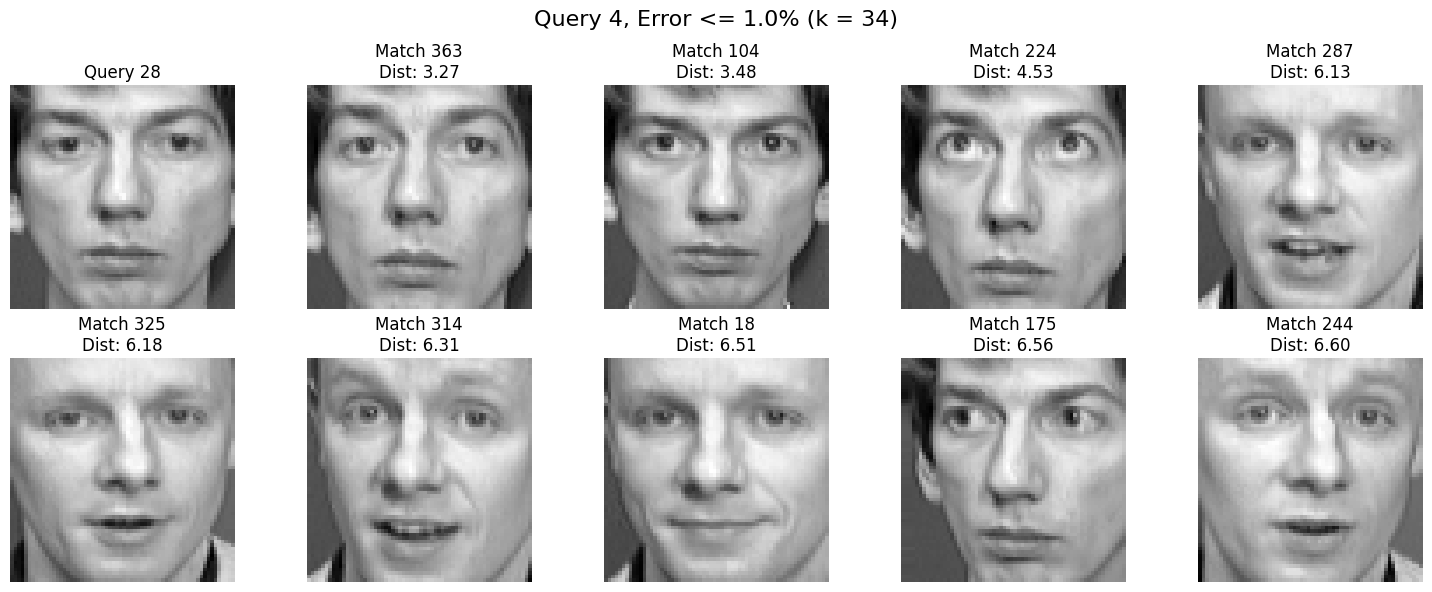

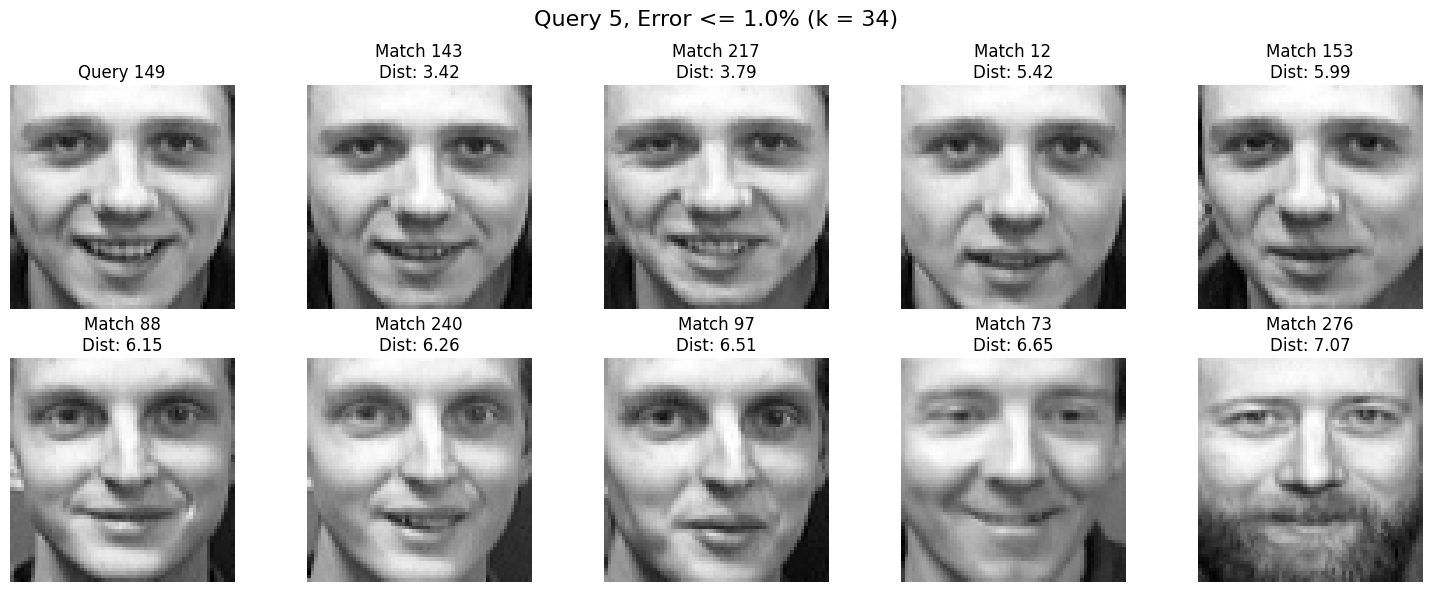

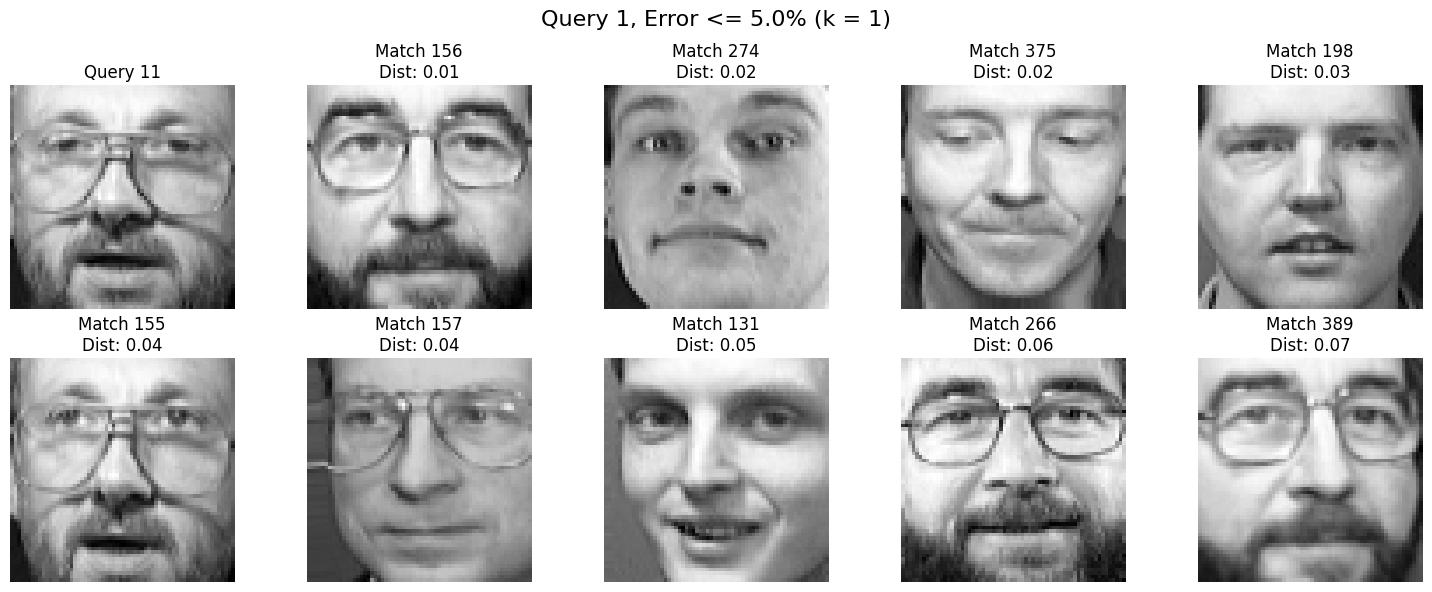

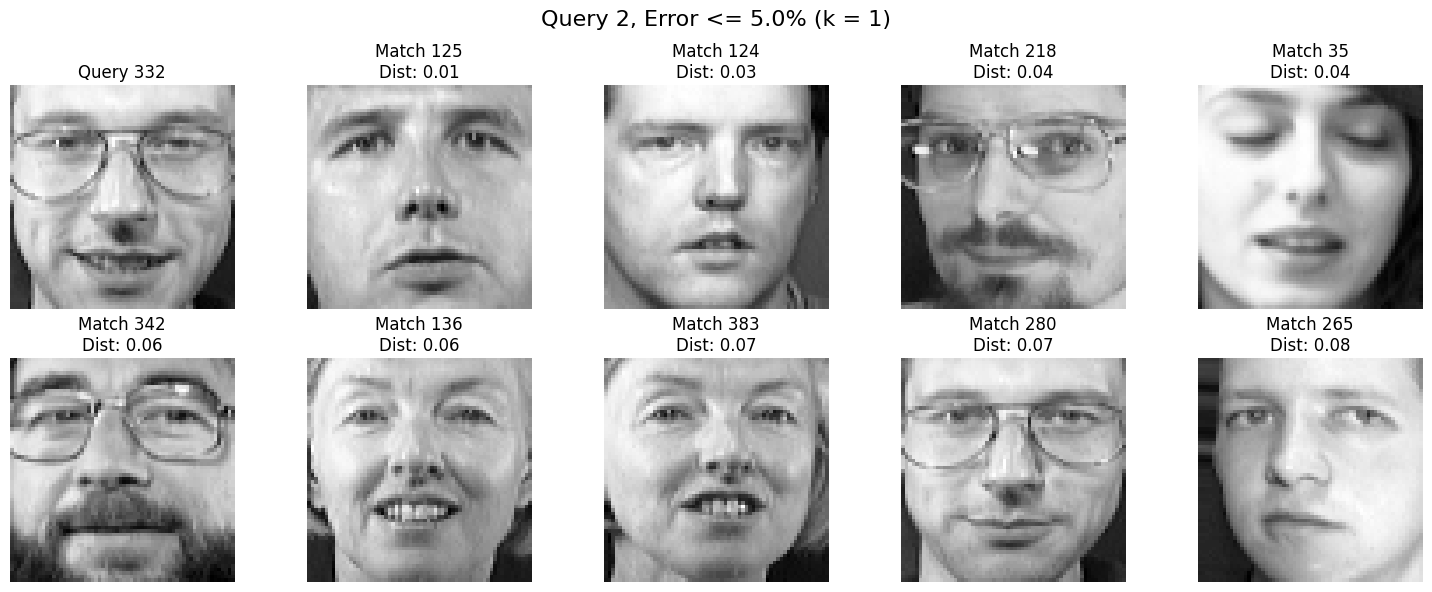

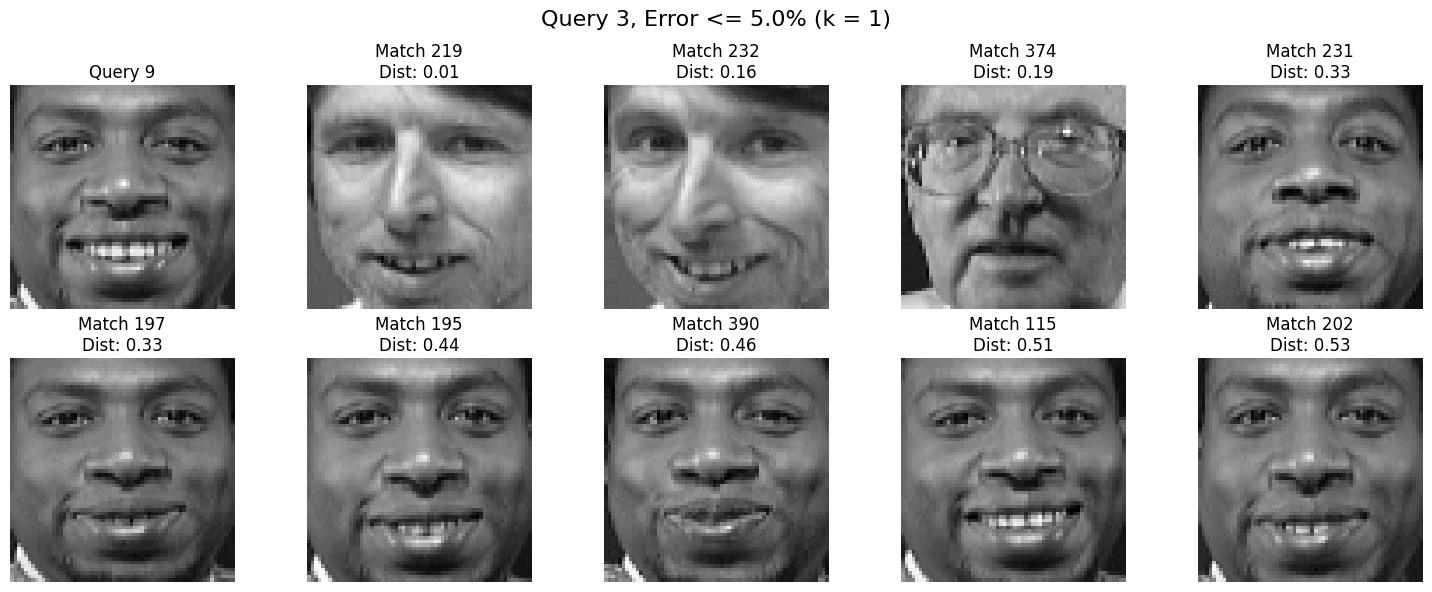

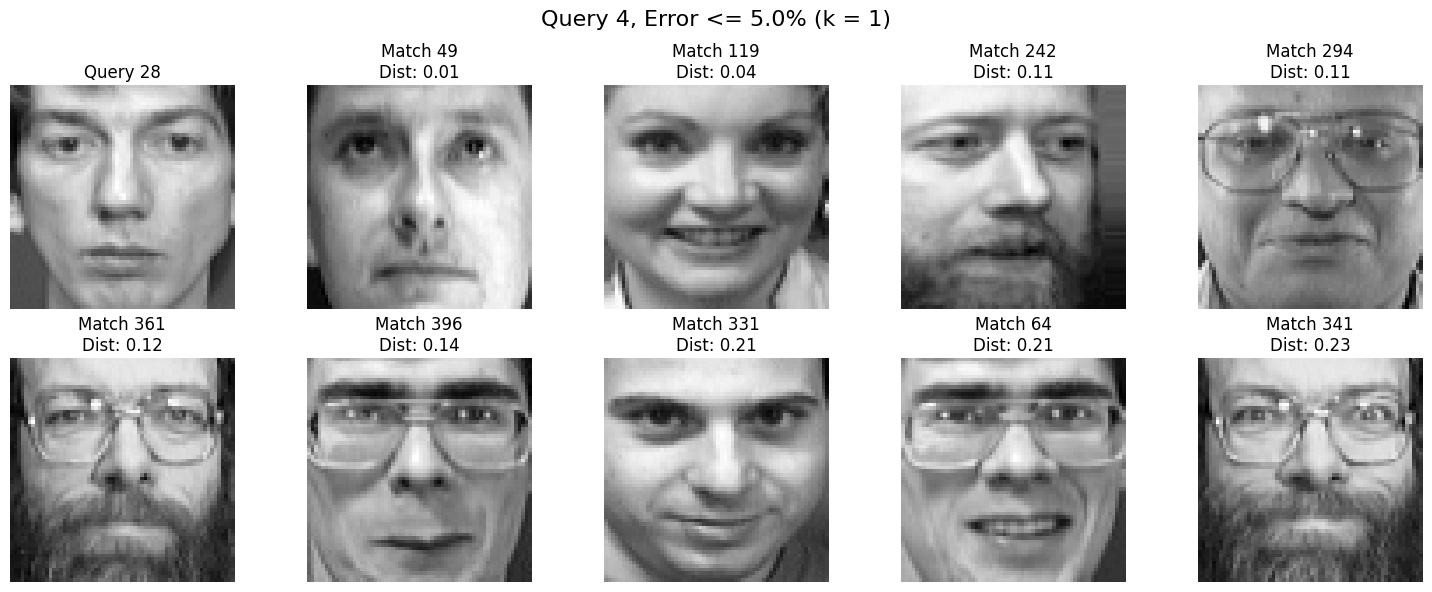

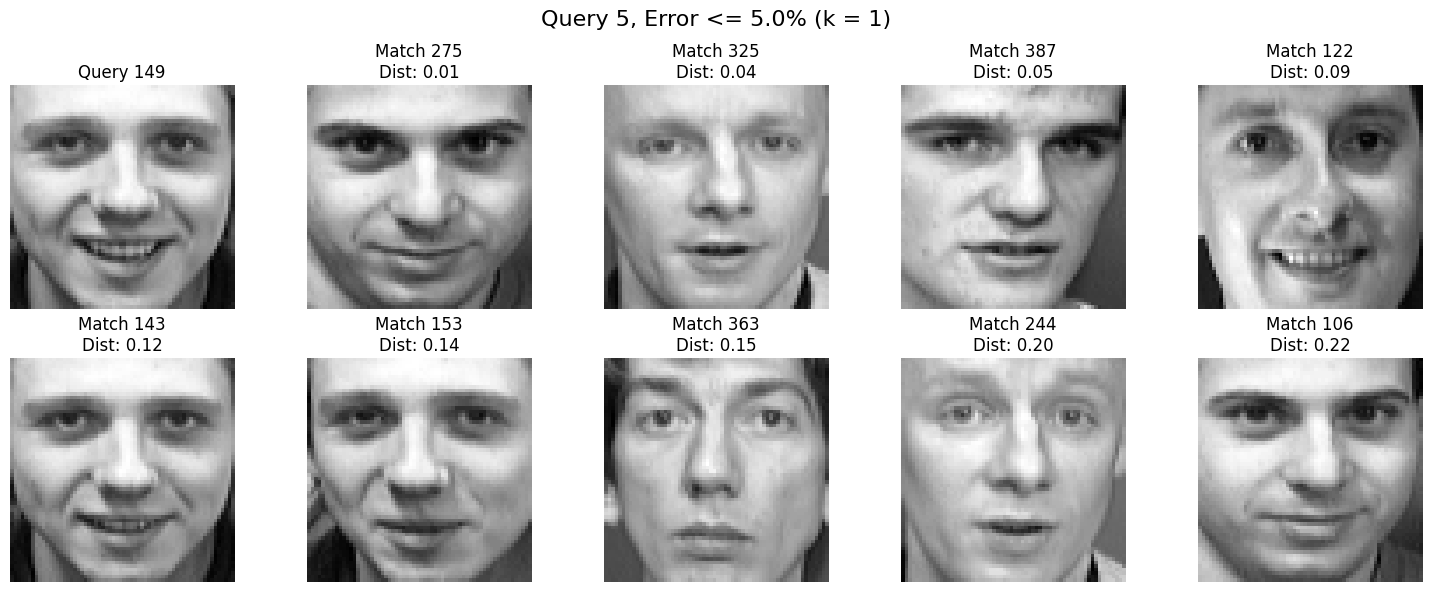

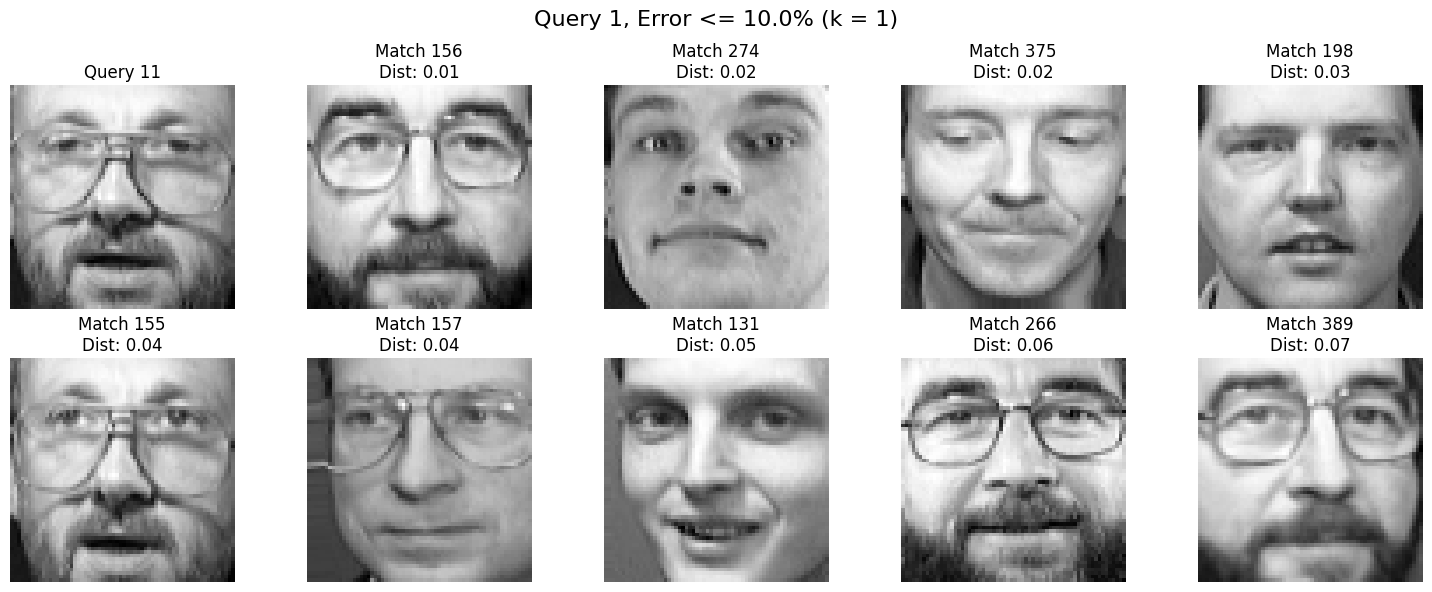

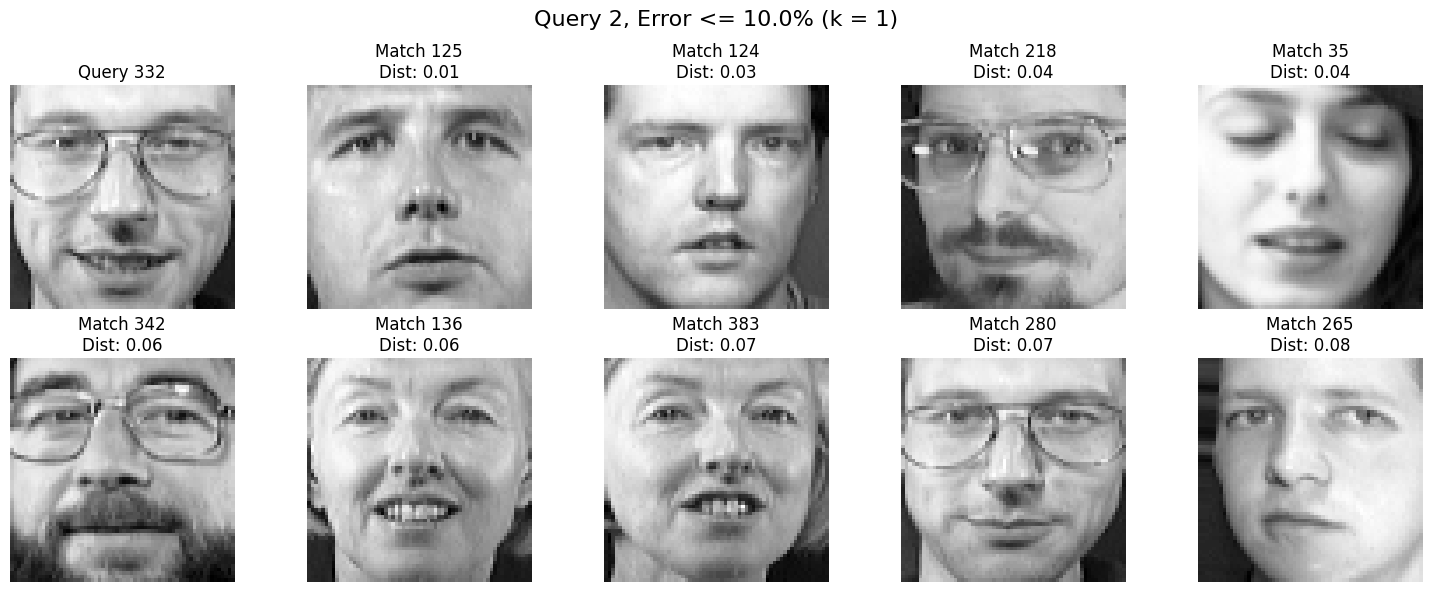

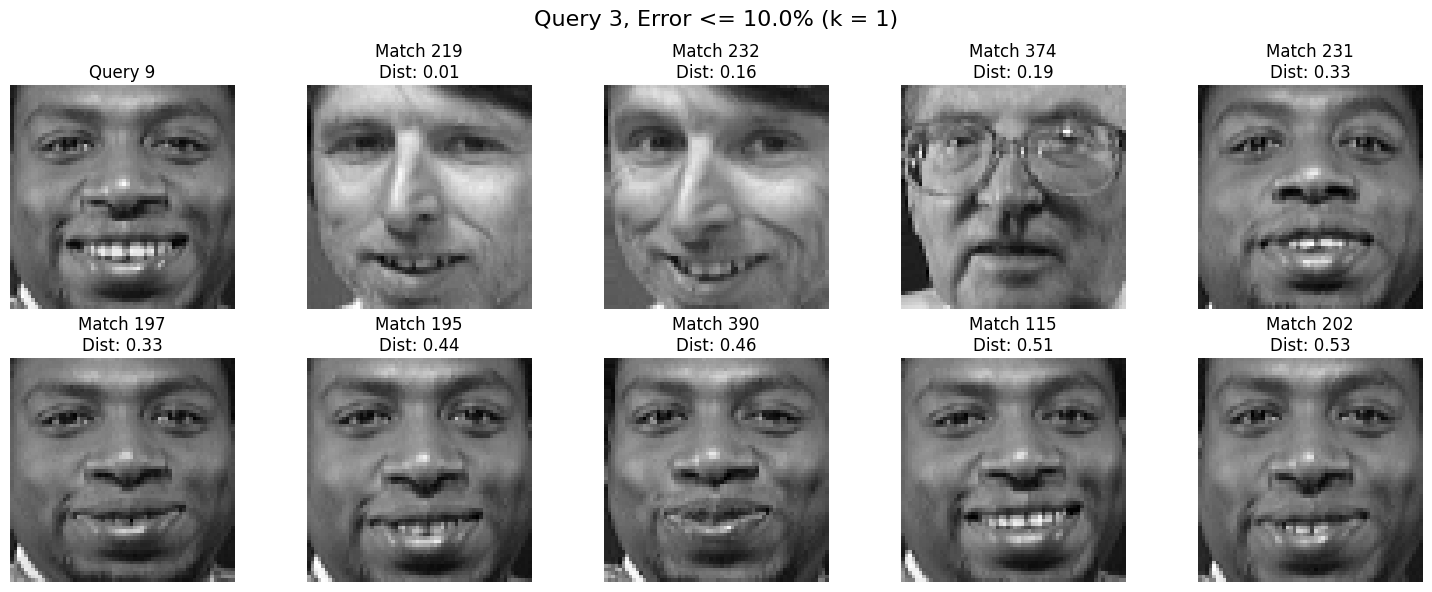

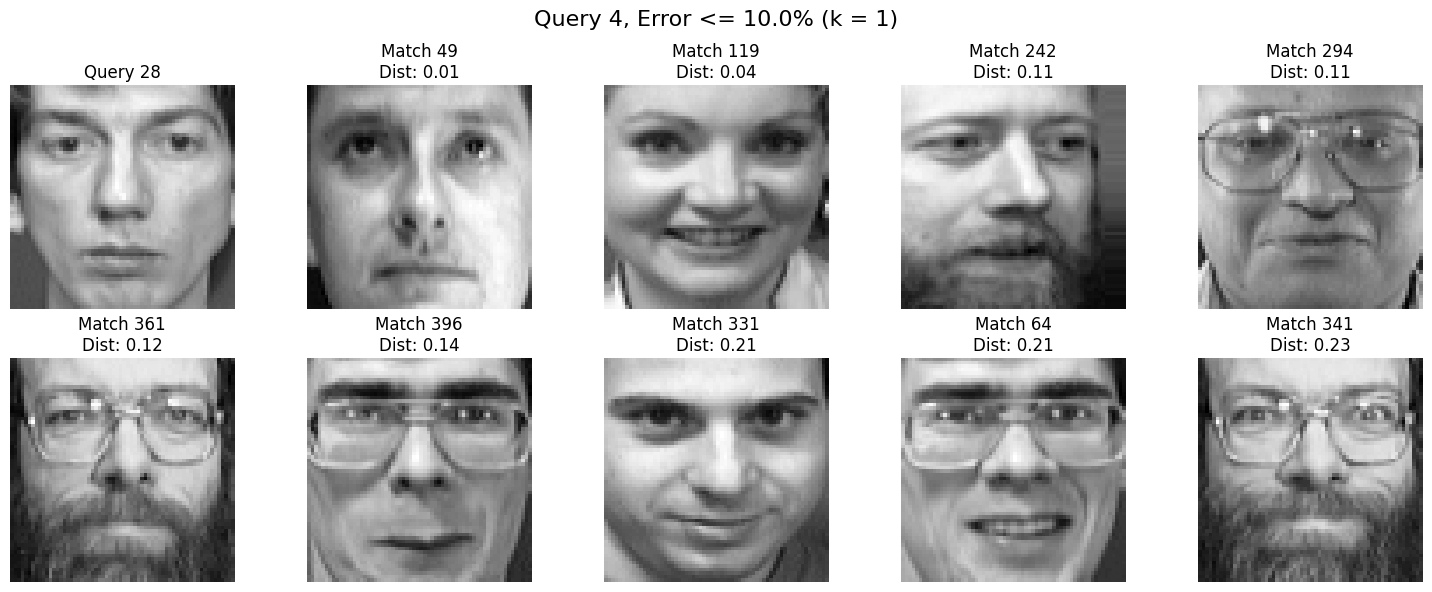

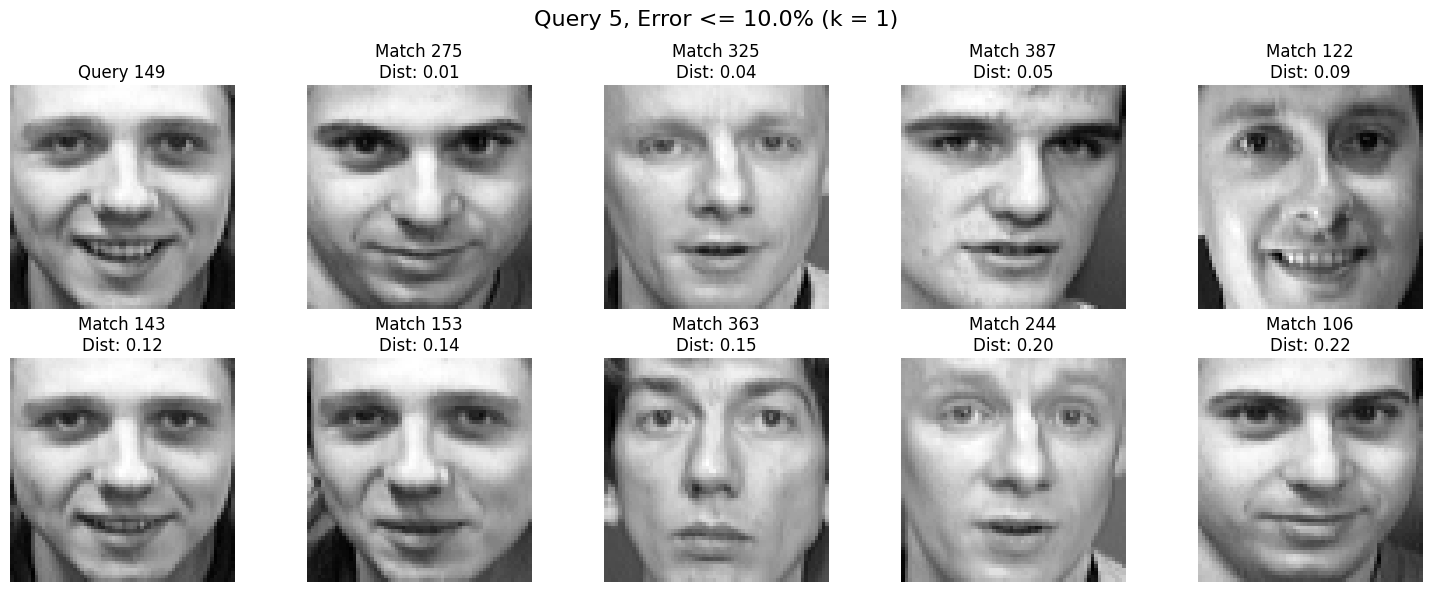

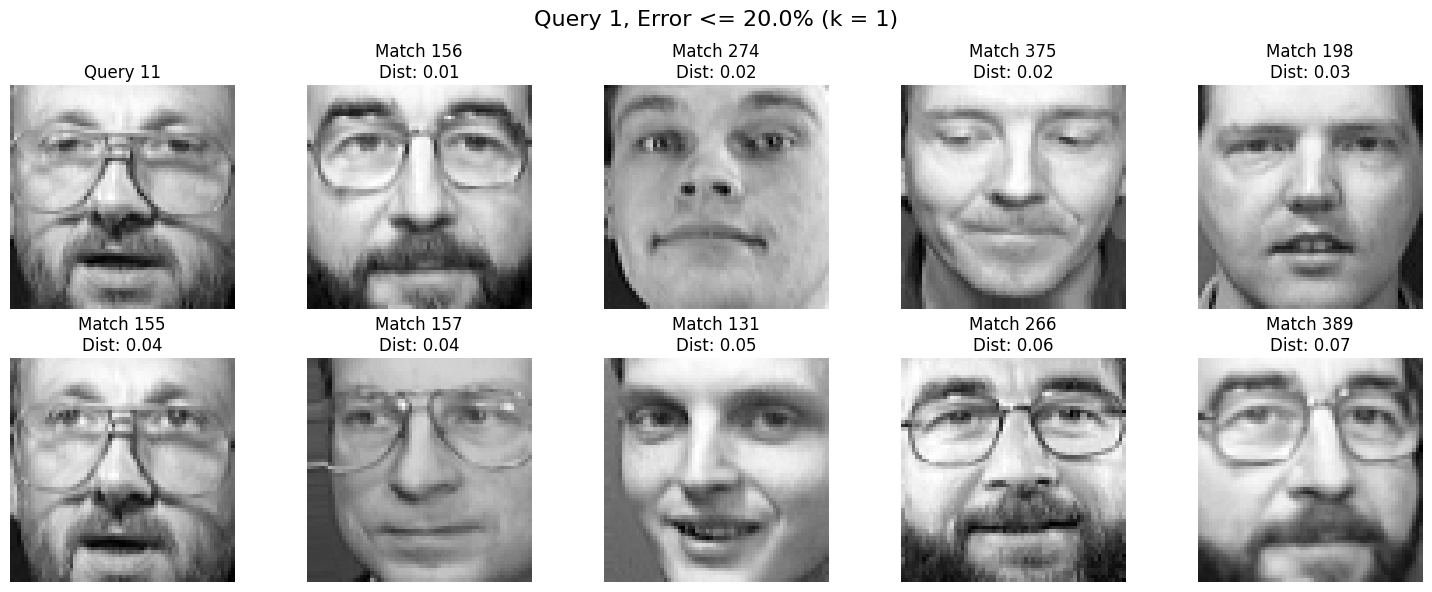

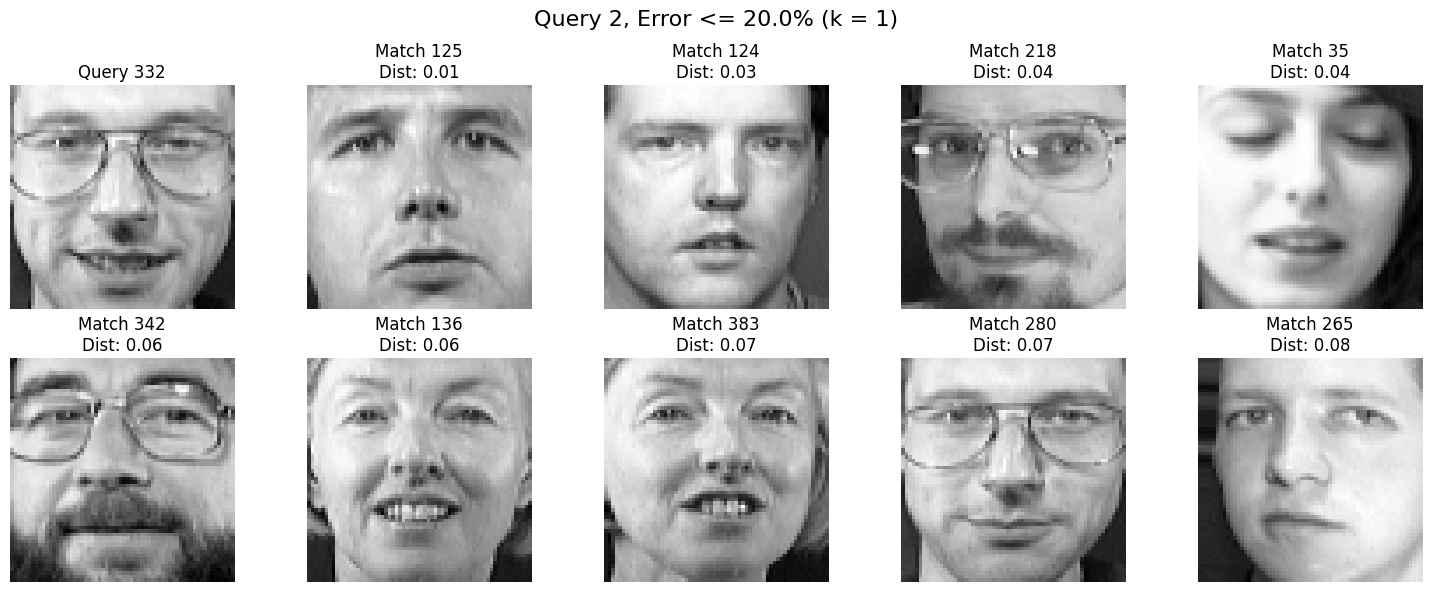

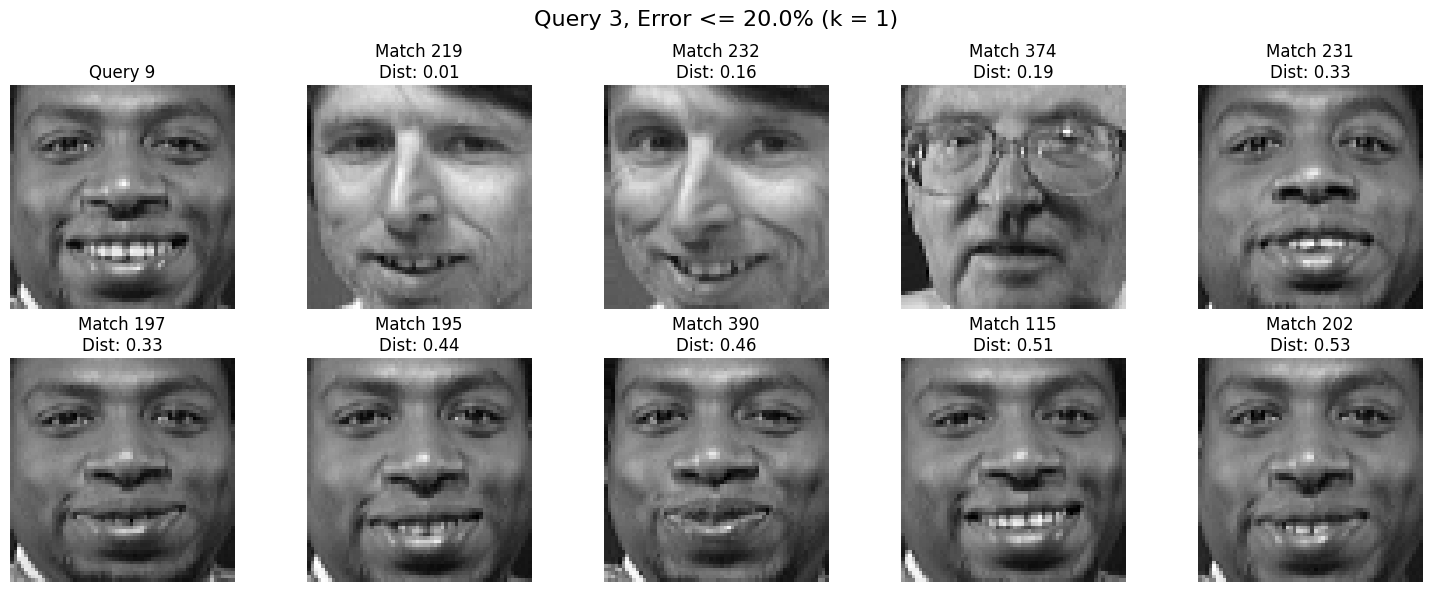

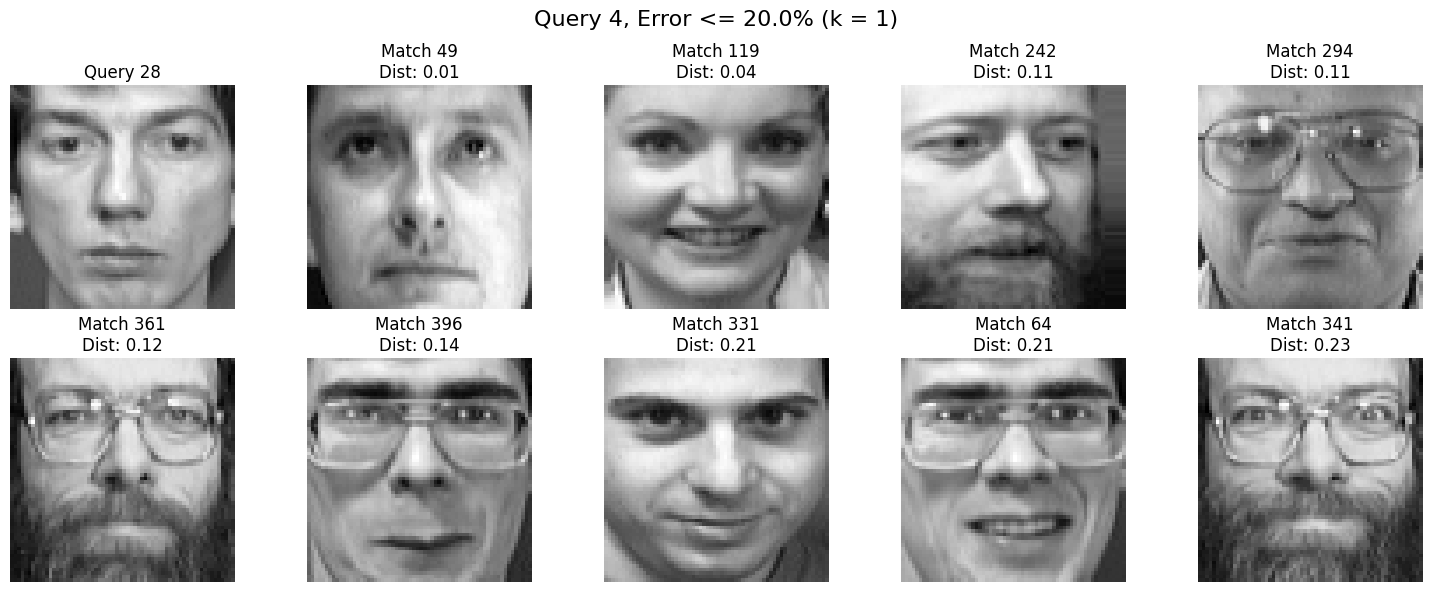

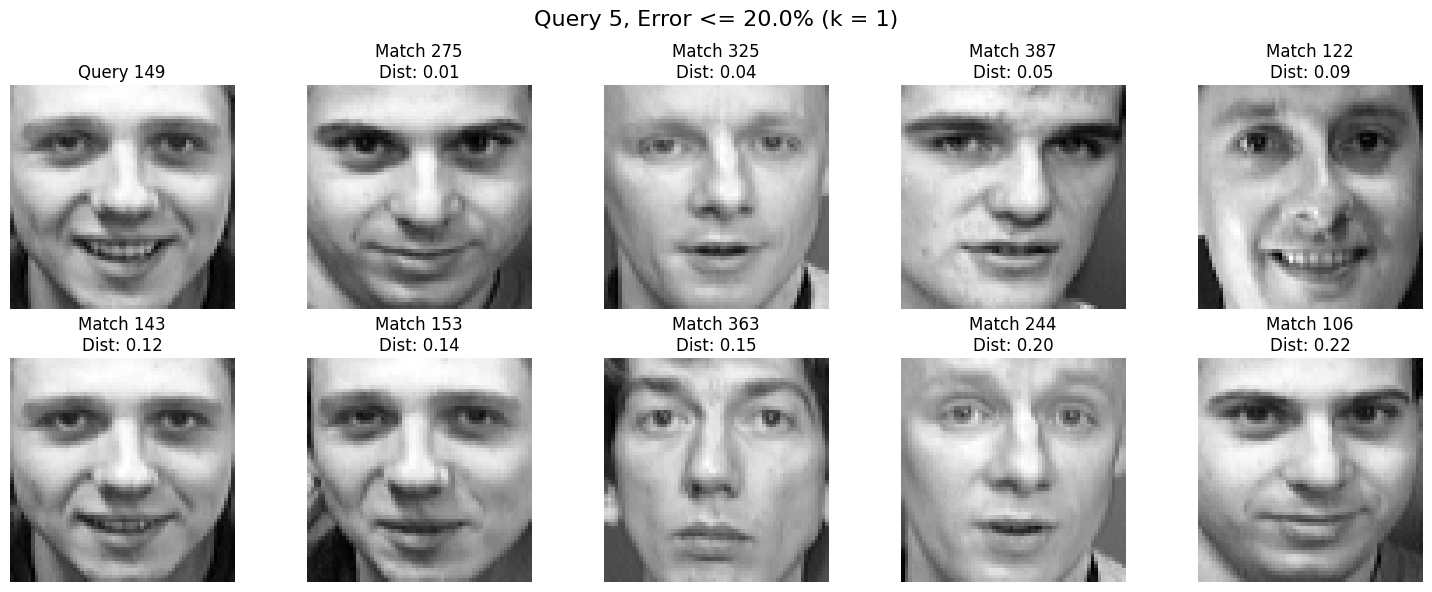


Computation Time Summary:
--------------------------------------------------
Components | Time (seconds)
--------------------------------------------------
   4096    |    0.0513    
   219     |    0.0380    
    34     |    0.0300    
    1      |    0.0299    
    1      |    0.0289    
    1      |    0.0293    
--------------------------------------------------


In [39]:
def find_k_nearest_neighbors(query, search_space, k=10):
    distances = []
    for i in range(search_space.shape[1]):
        dist = euclidean(query, search_space[:, i])
        distances.append((i, dist))
    # Sort by distance and return top k
    return sorted(distances, key=lambda x: x[1])[:k]

# Function to perform the entire search and measure time
def perform_k_nearest_search(X, query_indices, error_thresholds, U_samples, V_samples, Sigma_samples, n_comps, k=10):
    results_time = []

    for error_idx, n_comp in enumerate(n_comps):
        # Compute reduced representation
        start_reduction_time = time.perf_counter()
        Uk = U_samples[:, :n_comp]
        V_k = V_samples[:, :n_comp]
        Sigma_k = Sigma_samples[:, :n_comp]
        Ak = np.dot(Sigma_k, V_k.T)
        end_reduction_time = time.perf_counter()

        # Reduced query and search space
        query_images = Ak[:, query_indices]
        search_indices = np.array([i for i in range(X.shape[1]) if i not in query_indices])
        search_space = Ak[:, search_indices]

        # Measure time taken for k-nearest-neighbor search
        start_search_time = time.perf_counter()
        all_neighbors = []
        for i in range(5):  # For each query image
            neighbors = find_k_nearest_neighbors(query_images[:, i], search_space, k)
            # Convert local indices to original indices
            neighbors = [(search_indices[idx], dist) for idx, dist in neighbors]
            all_neighbors.append(neighbors)
        end_search_time = time.perf_counter()

        total_time = (end_reduction_time - start_reduction_time) + (end_search_time - start_search_time)
        results_time.append((n_comp, total_time))

        # Visualize results
        for query_idx in range(5):  # For each query image
            plt.figure(figsize=(15, 6))
            
            # Plot query image
            plt.subplot(2, 5, 1)
            plt.imshow(X[:, query_indices[query_idx]].reshape(64, 64), cmap='gray')
            plt.title(f'Query {query_indices[query_idx]}')
            plt.axis('off')

            # Plot top 10 matches
            for i, (match_idx, dist) in enumerate(all_neighbors[query_idx]):
                plt.subplot(2, 5, i + 2)
                plt.imshow(X[:, match_idx].reshape(64, 64), cmap='gray')
                plt.title(f'Match {match_idx}\nDist: {dist:.2f}')
                plt.axis('off')

            plt.suptitle(f'Query {query_idx + 1}, Error <= {error_thresholds[error_idx] * 100}% (k = {n_comp})', fontsize=16)
            plt.tight_layout()
            plt.show()

    return results_time

# Use the same error thresholds and components as before
error_thresholds = [0, 0.001, 0.01, 0.05, 0.1, 0.2]
n_comps = [len(Sigma_samples)] + n_comps if n_comps[0] != len(Sigma_samples) else n_comps

# Perform k-nearest neighbor search
results_time = perform_k_nearest_search(X, query_indices, error_thresholds, U_samples, V_samples, Sigma_samples, n_comps, k=9)

# Print computation times
print("\nComputation Time Summary:")
print("-" * 50)
print("Components | Time (seconds)")
print("-" * 50)
for (k, time_taken) in results_time:
    print(f"{k:^10d} | {time_taken:^13.4f}")
print("-" * 50)